In [19]:
import pandas as pd

uid_check = ['아파트1-104-1006']
tss_transition = pd.DataFrame(columns=['K','tss','wss', 'ecv', 'cdpv', 'mdis' ,'mcdpv', 'og_length', 'new_length', 'sequence'])

import pandas as pd
from modules.UCKMeans import UCKMeans as UC
from modules.UCOSKMeans import UCOSKMeans as UCOS
from modules.SortMeans import SortMeans as SM
from modules.THMeans import THMeans as TH

# Mongo 연결
from pymongo import MongoClient as mc
import random
import pprint as pp

#  print(uid_check)
# custom module
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

mongo_uri = "mongodb://localhost:27017"
client = mc(mongo_uri)

keti_pr_db = client.keti_pattern_recognition
household_col = keti_pr_db.household_info

for seq in range(0, 200):
    total = household_col.find({"uid": { "$nin" : uid_check }}).count()
    while True:
        db_datas = list(household_col.\
                        find({
                            "uid": { "$nin" : uid_check }
                            }).skip(random.randrange(0,total)).limit(1))
        if len(db_datas) == 0 :
            continue
        else:
            db_datas = db_datas[0]
            break;
#     db_datas = household_col.\
#                     find_one({
#                         "uid": "아파트1-104-303"
#                     })


    # require module
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from datetime import datetime as dt

    sns.set(rc={'figure.figsize': (15.7, 13.27)})
    plt.rcParams['figure.figsize'] = 15.7,13.27
    plt.rcParams['font.family'] = 'AppleGothic'

    # custom module
    %load_ext autoreload
    %autoreload 2
    %reload_ext autoreload

    import custom.supports as sp
    import custom.mapgenerator as mg
    import custom.dateutils as du

    SEASONS = {
        "봄" : [3, 4, 5],
        "여름" : [6, 7, 8],
        "가을" : [9, 10, 11],
        "겨울" : [12, 1, 2]
    }

    SEASONSARR = ['봄','여름','가을','겨울']

    '''
     0 : 봄
     1 : 여름
     2 : 가을
     3 : 겨울
    '''

    DAYARR = ["월", "화", "수", "목", "금", "토", "일"]

    uid, timeslot = db_datas['uid'], db_datas['timeslot']
    uid_check.append(uid)

    print("{}:{} pattern recognition".format(seq,uid))

    datelist = [
        dt.strptime(ts['time'], "%Y-%m-%d T%H:%M %z").date()
        for ts in timeslot
    ]
    datelist = list(set(datelist))
    datelist.sort()

    ts_datas = {}
    start_idx = 0
    end_idx = 96
    enl = 1

    for date in datelist:
        ts_datas[date] = [ ts['power'] * enl for ts in timeslot[start_idx:end_idx]]
        start_idx = end_idx
        end_idx = end_idx + 96

    ts_datas = pd.DataFrame(ts_datas).T
    datas = ts_datas.reset_index().copy()

    datas.rename(columns={"index": "date"}, inplace=True)
    datas['date'] = pd.to_datetime(datas['date'])
    datas['month'] = [dt.month for dt in datas['date']]
    datas = [
        datas[(datas['month'].isin(SEASONS[season]))].copy()
        for season in SEASONSARR
    ]

    bak_datas = datas.copy()

    season_datas = {
        "봄": datas[0].copy(),
        "여름": datas[1].copy(),
        "가을": datas[2].copy(),
        "겨울": datas[3].copy()
    }

    # merge timeslot
    season = "가을"

    timeslot = 1
    merge_size = timeslot * 4
    merge_datas = season_datas[season].copy()
    merge_datas = merge_datas[
        merge_datas.columns.difference(['month', 'date'])
    ]
    merge_datas.index = season_datas[season]['date']

    tmp = pd.DataFrame()
    start_idx = 0
    end_idx = 96
    for date in merge_datas.index:
        in_arr = []
        og_arr = merge_datas.loc[date].values
        for merging in range(0, int(end_idx / merge_size)):
            in_arr.append(og_arr[
                (merging) * merge_size
                :
                (merging + 1) * merge_size
            ].sum())
    #     logging
    #     print("date end : {}, size: {}".format(date, len(in_arr)))

        tmp[date] = in_arr
    merge_datas = tmp.copy()

    th = TH(merge_datas)
    th.run()
    
    tss_transition.loc[uid] = [
        th.K,
        th.tss,
        th.wss,
        th.ecv,
        th.cdpv,
        th.mdis,
        th.mcdpv,
        th.og_length,
        th.new_length,
        th.sequence
    ]
    
    print(tss_transition)
    
client.close()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0:아파트4-101-1102 pattern recognition


<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.738648507530207, sim_check: 0.45662330891002423
- remove outlier success: 91 => 83
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 83
Cluster Worst Pattern In
1: calc... [82, 0]
1: [82, 0, 41]
2: calc... [82, 41, 0]
2: calc... [82, 41, 0, 62]
2: [82, 41, 0, 62, 21]
4: calc... [82, 62, 41, 21, 0]
4: calc... [82, 62, 41, 21, 0, 72]
4: calc... [82, 62, 41, 21, 0, 72, 52]
4: calc... [82, 62, 41, 21, 0, 72, 52, 31]
4: [82, 62, 41, 21, 0, 72, 52, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.8341104014375513, sim_check: 0.21460490355807005
- remove outlier success: 91 => 86
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 86
Cluster Worst Pattern In
1: calc... [85, 0]
1: [85, 0, 43]
2: calc... [85, 43, 0]
2: calc... [85, 43, 0, 64]
2: [85, 43, 0, 64, 22]
4: calc... [85, 64, 43, 22, 0]
4: calc... [85, 64, 43, 22, 0, 75]
4: calc... [85, 64, 43, 22, 0, 75, 54]
4: calc... [85, 64, 43, 22, 0, 75, 54, 33]
4: [85, 64, 43, 22, 0, 75, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.0738956102138622, sim_check: 0.9816826949119439
- remove outlier success: 91 => 68
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 68
Cluster Worst Pattern In
1: calc... [67, 0]
1: [67, 0, 34]
2: calc... [67, 34, 0]
2: calc... [67, 34, 0, 51]
2: [67, 34, 0, 51, 17]
4: calc... [67, 51, 34, 17, 0]
4: calc... [67, 51, 34, 17, 0, 59]
4: calc... [67, 51, 34, 17, 0, 59, 43]
4: calc... [67, 51, 34, 17, 0, 59, 43, 26]
4: [67, 51, 34, 17, 0, 59, 43, 26, 9]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) success

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.8690338412039226, sim_check: 0.06976037772250798
- remove outlier success: 91 => 87
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 87
Cluster Worst Pattern In
1: calc... [86, 0]
1: [86, 0, 43]
2: calc... [86, 43, 0]
2: calc... [86, 43, 0, 65]
2: [86, 43, 0, 65, 22]
4: calc... [86, 65, 43, 22, 0]
4: calc... [86, 65, 43, 22, 0, 76]
4: calc... [86, 65, 43, 22, 0, 76, 54]
4: calc... [86, 65, 43, 22, 0, 76, 54, 33]
4: [86, 65, 43, 22, 0, 76, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.2619533399428396, sim_check: 0.3509901208563154
- remove outlier success: 91 => 84
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 84
Cluster Worst Pattern In
1: calc... [83, 0]
1: [83, 0, 42]
2: calc... [83, 42, 0]
2: calc... [83, 42, 0, 63]
2: [83, 42, 0, 63, 21]
4: calc... [83, 63, 42, 21, 0]
4: calc... [83, 63, 42, 21, 0, 73]
4: calc... [83, 63, 42, 21, 0, 73, 53]
4: calc... [83, 63, 42, 21, 0, 73, 53, 32]
4: [83, 63, 42, 21, 0, 73, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.9620192437933348, sim_check: 0.534880718160322
- remove outlier success: 91 => 87
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 87
Cluster Worst Pattern In
1: calc... [86, 0]
1: [86, 0, 43]
2: calc... [86, 43, 0]
2: calc... [86, 43, 0, 65]
2: [86, 43, 0, 65, 22]
4: calc... [86, 65, 43, 22, 0]
4: calc... [86, 65, 43, 22, 0, 76]
4: calc... [86, 65, 43, 22, 0, 76, 54]
4: calc... [86, 65, 43, 22, 0, 76, 54, 33]
4: [86, 65, 43, 22, 0, 76, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Clu

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.6108067199331331, sim_check: 0.22312656590626728
- remove outlier success: 91 => 87
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 87
Cluster Worst Pattern In
1: calc... [86, 0]
1: [86, 0, 43]
2: calc... [86, 43, 0]
2: calc... [86, 43, 0, 65]
2: [86, 43, 0, 65, 22]
4: calc... [86, 65, 43, 22, 0]
4: calc... [86, 65, 43, 22, 0, 76]
4: calc... [86, 65, 43, 22, 0, 76, 54]
4: calc... [86, 65, 43, 22, 0, 76, 54, 33]
4: [86, 65, 43, 22, 0, 76, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.19149988933675305, sim_check: 0.7294318500716352
- remove outlier success: 91 => 82
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 82
Cluster Worst Pattern In
1: calc... [81, 0]
1: [81, 0, 41]
2: calc... [81, 41, 0]
2: calc... [81, 41, 0, 61]
2: [81, 41, 0, 61, 21]
4: calc... [81, 61, 41, 21, 0]
4: calc... [81, 61, 41, 21, 0, 71]
4: calc... [81, 61, 41, 21, 0, 71, 51]
4: calc... [81, 61, 41, 21, 0, 71, 51, 31]
4: [81, 61, 41, 21, 0, 71, 51, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.8725718958942095, sim_check: 0.235722266459854
- remove outlier success: 91 => 86
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 86
Cluster Worst Pattern In
1: calc... [85, 0]
1: [85, 0, 43]
2: calc... [85, 43, 0]
2: calc... [85, 43, 0, 64]
2: [85, 43, 0, 64, 22]
4: calc... [85, 64, 43, 22, 0]
4: calc... [85, 64, 43, 22, 0, 75]
4: calc... [85, 64, 43, 22, 0, 75, 54]
4: calc... [85, 64, 43, 22, 0, 75, 54, 33]
4: [85, 64, 43, 22, 0, 75, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Clu

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.789826430143338, sim_check: 0.6198864589411822
- remove outlier success: 91 => 80
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 80
Cluster Worst Pattern In
1: calc... [79, 0]
1: [79, 0, 40]
2: calc... [79, 40, 0]
2: calc... [79, 40, 0, 60]
2: [79, 40, 0, 60, 20]
4: calc... [79, 60, 40, 20, 0]
4: calc... [79, 60, 40, 20, 0, 70]
4: calc... [79, 60, 40, 20, 0, 70, 50]
4: calc... [79, 60, 40, 20, 0, 70, 50, 30]
4: [79, 60, 40, 20, 0, 70, 50, 30, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) success

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.8332812495348216, sim_check: 0.23140054927266562
- remove outlier success: 91 => 87
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 87
Cluster Worst Pattern In
1: calc... [86, 0]
1: [86, 0, 43]
2: calc... [86, 43, 0]
2: calc... [86, 43, 0, 65]
2: [86, 43, 0, 65, 22]
4: calc... [86, 65, 43, 22, 0]
4: calc... [86, 65, 43, 22, 0, 76]
4: calc... [86, 65, 43, 22, 0, 76, 54]
4: calc... [86, 65, 43, 22, 0, 76, 54, 33]
4: [86, 65, 43, 22, 0, 76, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.8064576978098213, sim_check: 0.2215572622677464
- remove outlier success: 91 => 83
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 83
Cluster Worst Pattern In
1: calc... [82, 0]
1: [82, 0, 41]
2: calc... [82, 41, 0]
2: calc... [82, 41, 0, 62]
2: [82, 41, 0, 62, 21]
4: calc... [82, 62, 41, 21, 0]
4: calc... [82, 62, 41, 21, 0, 72]
4: calc... [82, 62, 41, 21, 0, 72, 52]
4: calc... [82, 62, 41, 21, 0, 72, 52, 31]
4: [82, 62, 41, 21, 0, 72, 52, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.9725709350079095, sim_check: 0.2543566514719794
- remove outlier success: 91 => 86
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 86
Cluster Worst Pattern In
1: calc... [85, 0]
1: [85, 0, 43]
2: calc... [85, 43, 0]
2: calc... [85, 43, 0, 64]
2: [85, 43, 0, 64, 22]
4: calc... [85, 64, 43, 22, 0]
4: calc... [85, 64, 43, 22, 0, 75]
4: calc... [85, 64, 43, 22, 0, 75, 54]
4: calc... [85, 64, 43, 22, 0, 75, 54, 33]
4: [85, 64, 43, 22, 0, 75, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 1.1011558196507716, sim_check: 0.11791218386859897
- remove outlier success: 91 => 90
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 90
Cluster Worst Pattern In
1: calc... [89, 0]
1: [89, 0, 45]
2: calc... [89, 45, 0]
2: calc... [89, 45, 0, 67]
2: [89, 45, 0, 67, 23]
4: calc... [89, 67, 45, 23, 0]
4: calc... [89, 67, 45, 23, 0, 78]
4: calc... [89, 67, 45, 23, 0, 78, 56]
4: calc... [89, 67, 45, 23, 0, 78, 56, 34]
4: [89, 67, 45, 23, 0, 78, 56, 34, 12]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.27090327222572674, sim_check: 0.4035526717153705
- remove outlier success: 91 => 78
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 78
Cluster Worst Pattern In
1: calc... [77, 0]
1: [77, 0, 39]
2: calc... [77, 39, 0]
2: calc... [77, 39, 0, 58]
2: [77, 39, 0, 58, 20]
4: calc... [77, 58, 39, 20, 0]
4: calc... [77, 58, 39, 20, 0, 68]
4: calc... [77, 58, 39, 20, 0, 68, 49]
4: calc... [77, 58, 39, 20, 0, 68, 49, 30]
4: [77, 58, 39, 20, 0, 68, 49, 30, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.4124828702521781, sim_check: 0.3157702534785446
- remove outlier success: 91 => 82
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 82
Cluster Worst Pattern In
1: calc... [81, 0]
1: [81, 0, 41]
2: calc... [81, 41, 0]
2: calc... [81, 41, 0, 61]
2: [81, 41, 0, 61, 21]
4: calc... [81, 61, 41, 21, 0]
4: calc... [81, 61, 41, 21, 0, 71]
4: calc... [81, 61, 41, 21, 0, 71, 51]
4: calc... [81, 61, 41, 21, 0, 71, 51, 31]
4: [81, 61, 41, 21, 0, 71, 51, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.7042215252542152, sim_check: 0.3642625496879463
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.8675712943596766, sim_check: 0.4042317743172503
- remove outlier success: 91 => 86
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 86
Cluster Worst Pattern In
1: calc... [85, 0]
1: [85, 0, 43]
2: calc... [85, 43, 0]
2: calc... [85, 43, 0, 64]
2: [85, 43, 0, 64, 22]
4: calc... [85, 64, 43, 22, 0]
4: calc... [85, 64, 43, 22, 0, 75]
4: calc... [85, 64, 43, 22, 0, 75, 54]
4: calc... [85, 64, 43, 22, 0, 75, 54, 33]
4: [85, 64, 43, 22, 0, 75, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.6106212421691732, sim_check: 0.4179313756766343
- remove outlier success: 91 => 84
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 84
Cluster Worst Pattern In
1: calc... [83, 0]
1: [83, 0, 42]
2: calc... [83, 42, 0]
2: calc... [83, 42, 0, 63]
2: [83, 42, 0, 63, 21]
4: calc... [83, 63, 42, 21, 0]
4: calc... [83, 63, 42, 21, 0, 73]
4: calc... [83, 63, 42, 21, 0, 73, 53]
4: calc... [83, 63, 42, 21, 0, 73, 53, 32]
4: [83, 63, 42, 21, 0, 73, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.9261436573090919, sim_check: 0.5323314703795987
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 1.0516195290625752, sim_check: 0.1306118728853714
- remove outlier success: 91 => 89
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 89
Cluster Worst Pattern In
1: calc... [88, 0]
1: [88, 0, 44]
2: calc... [88, 44, 0]
2: calc... [88, 44, 0, 66]
2: [88, 44, 0, 66, 22]
4: calc... [88, 66, 44, 22, 0]
4: calc... [88, 66, 44, 22, 0, 77]
4: calc... [88, 66, 44, 22, 0, 77, 55]
4: calc... [88, 66, 44, 22, 0, 77, 55, 33]
4: [88, 66, 44, 22, 0, 77, 55, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.9525673013717613, sim_check: 0.1421344561490978
- remove outlier success: 91 => 88
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 88
Cluster Worst Pattern In
1: calc... [87, 0]
1: [87, 0, 44]
2: calc... [87, 44, 0]
2: calc... [87, 44, 0, 66]
2: [87, 44, 0, 66, 22]
4: calc... [87, 66, 44, 22, 0]
4: calc... [87, 66, 44, 22, 0, 77]
4: calc... [87, 66, 44, 22, 0, 77, 55]
4: calc... [87, 66, 44, 22, 0, 77, 55, 33]
4: [87, 66, 44, 22, 0, 77, 55, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.8710169580659327, sim_check: 0.20054533805775449
- remove outlier success: 91 => 86
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 86
Cluster Worst Pattern In
1: calc... [85, 0]
1: [85, 0, 43]
2: calc... [85, 43, 0]
2: calc... [85, 43, 0, 64]
2: [85, 43, 0, 64, 22]
4: calc... [85, 64, 43, 22, 0]
4: calc... [85, 64, 43, 22, 0, 75]
4: calc... [85, 64, 43, 22, 0, 75, 54]
4: calc... [85, 64, 43, 22, 0, 75, 54, 33]
4: [85, 64, 43, 22, 0, 75, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.9356140541825031, sim_check: 0.25582412590833803
- remove outlier success: 91 => 88
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 88
Cluster Worst Pattern In
1: calc... [87, 0]
1: [87, 0, 44]
2: calc... [87, 44, 0]
2: calc... [87, 44, 0, 66]
2: [87, 44, 0, 66, 22]
4: calc... [87, 66, 44, 22, 0]
4: calc... [87, 66, 44, 22, 0, 77]
4: calc... [87, 66, 44, 22, 0, 77, 55]
4: calc... [87, 66, 44, 22, 0, 77, 55, 33]
4: [87, 66, 44, 22, 0, 77, 55, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.5194848187684268, sim_check: 0.2094555865360399
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.5098603218764921, sim_check: 0.20276830178301475
- remove outlier success: 91 => 79
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 79
Cluster Worst Pattern In
1: calc... [78, 0]
1: [78, 0, 39]
2: calc... [78, 39, 0]
2: calc... [78, 39, 0, 59]
2: [78, 39, 0, 59, 20]
4: calc... [78, 59, 39, 20, 0]
4: calc... [78, 59, 39, 20, 0, 69]
4: calc... [78, 59, 39, 20, 0, 69, 49]
4: calc... [78, 59, 39, 20, 0, 69, 49, 30]
4: [78, 59, 39, 20, 0, 69, 49, 30, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.38959946613094254, sim_check: 0.5883431597167592
- remove outlier success: 91 => 83
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 83
Cluster Worst Pattern In
1: calc... [82, 0]
1: [82, 0, 41]
2: calc... [82, 41, 0]
2: calc... [82, 41, 0, 62]
2: [82, 41, 0, 62, 21]
4: calc... [82, 62, 41, 21, 0]
4: calc... [82, 62, 41, 21, 0, 72]
4: calc... [82, 62, 41, 21, 0, 72, 52]
4: calc... [82, 62, 41, 21, 0, 72, 52, 31]
4: [82, 62, 41, 21, 0, 72, 52, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.5395964570197217, sim_check: 0.49686876265763136
- remove outlier success: 91 => 82
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 82
Cluster Worst Pattern In
1: calc... [81, 0]
1: [81, 0, 41]
2: calc... [81, 41, 0]
2: calc... [81, 41, 0, 61]
2: [81, 41, 0, 61, 21]
4: calc... [81, 61, 41, 21, 0]
4: calc... [81, 61, 41, 21, 0, 71]
4: calc... [81, 61, 41, 21, 0, 71, 51]
4: calc... [81, 61, 41, 21, 0, 71, 51, 31]
4: [81, 61, 41, 21, 0, 71, 51, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.6842178562495661, sim_check: 0.711210361373275
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Clu

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.4898468435527096, sim_check: 0.19443668806357234
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.40866371789008443, sim_check: 0.2625424737156602
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.6158304749066409, sim_check: 0.49711313206646923
- remove outlier success: 91 => 82
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 82
Cluster Worst Pattern In
1: calc... [81, 0]
1: [81, 0, 41]
2: calc... [81, 41, 0]
2: calc... [81, 41, 0, 61]
2: [81, 41, 0, 61, 21]
4: calc... [81, 61, 41, 21, 0]
4: calc... [81, 61, 41, 21, 0, 71]
4: calc... [81, 61, 41, 21, 0, 71, 51]
4: calc... [81, 61, 41, 21, 0, 71, 51, 31]
4: [81, 61, 41, 21, 0, 71, 51, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.6650690909195043, sim_check: 0.5917649245942584
- remove outlier success: 91 => 83
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 83
Cluster Worst Pattern In
1: calc... [82, 0]
1: [82, 0, 41]
2: calc... [82, 41, 0]
2: calc... [82, 41, 0, 62]
2: [82, 41, 0, 62, 21]
4: calc... [82, 62, 41, 21, 0]
4: calc... [82, 62, 41, 21, 0, 72]
4: calc... [82, 62, 41, 21, 0, 72, 52]
4: calc... [82, 62, 41, 21, 0, 72, 52, 31]
4: [82, 62, 41, 21, 0, 72, 52, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.39770637963155564, sim_check: 0.5070567628948528
- remove outlier success: 91 => 79
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 79
Cluster Worst Pattern In
1: calc... [78, 0]
1: [78, 0, 39]
2: calc... [78, 39, 0]
2: calc... [78, 39, 0, 59]
2: [78, 39, 0, 59, 20]
4: calc... [78, 59, 39, 20, 0]
4: calc... [78, 59, 39, 20, 0, 69]
4: calc... [78, 59, 39, 20, 0, 69, 49]
4: calc... [78, 59, 39, 20, 0, 69, 49, 30]
4: [78, 59, 39, 20, 0, 69, 49, 30, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.6781836544234717, sim_check: 0.23074781353215196
- remove outlier success: 91 => 84
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 84
Cluster Worst Pattern In
1: calc... [83, 0]
1: [83, 0, 42]
2: calc... [83, 42, 0]
2: calc... [83, 42, 0, 63]
2: [83, 42, 0, 63, 21]
4: calc... [83, 63, 42, 21, 0]
4: calc... [83, 63, 42, 21, 0, 73]
4: calc... [83, 63, 42, 21, 0, 73, 53]
4: calc... [83, 63, 42, 21, 0, 73, 53, 32]
4: [83, 63, 42, 21, 0, 73, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.45195914321318936, sim_check: 0.25721928321913
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Clu

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.8946992572103875, sim_check: 0.5690807086861179
- remove outlier success: 91 => 87
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 87
Cluster Worst Pattern In
1: calc... [86, 0]
1: [86, 0, 43]
2: calc... [86, 43, 0]
2: calc... [86, 43, 0, 65]
2: [86, 43, 0, 65, 22]
4: calc... [86, 65, 43, 22, 0]
4: calc... [86, 65, 43, 22, 0, 76]
4: calc... [86, 65, 43, 22, 0, 76, 54]
4: calc... [86, 65, 43, 22, 0, 76, 54, 33]
4: [86, 65, 43, 22, 0, 76, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.5302147256061305, sim_check: 0.4628133813793009
- remove outlier success: 91 => 84
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 84
Cluster Worst Pattern In
1: calc... [83, 0]
1: [83, 0, 42]
2: calc... [83, 42, 0]
2: calc... [83, 42, 0, 63]
2: [83, 42, 0, 63, 21]
4: calc... [83, 63, 42, 21, 0]
4: calc... [83, 63, 42, 21, 0, 73]
4: calc... [83, 63, 42, 21, 0, 73, 53]
4: calc... [83, 63, 42, 21, 0, 73, 53, 32]
4: [83, 63, 42, 21, 0, 73, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.661796470788375, sim_check: 0.08162488656287481
- remove outlier success: 91 => 87
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 87
Cluster Worst Pattern In
1: calc... [86, 0]
1: [86, 0, 43]
2: calc... [86, 43, 0]
2: calc... [86, 43, 0, 65]
2: [86, 43, 0, 65, 22]
4: calc... [86, 65, 43, 22, 0]
4: calc... [86, 65, 43, 22, 0, 76]
4: calc... [86, 65, 43, 22, 0, 76, 54]
4: calc... [86, 65, 43, 22, 0, 76, 54, 33]
4: [86, 65, 43, 22, 0, 76, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.733890675852191, sim_check: 0.2268534333421539
- remove outlier success: 91 => 88
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 88
Cluster Worst Pattern In
1: calc... [87, 0]
1: [87, 0, 44]
2: calc... [87, 44, 0]
2: calc... [87, 44, 0, 66]
2: [87, 44, 0, 66, 22]
4: calc... [87, 66, 44, 22, 0]
4: calc... [87, 66, 44, 22, 0, 77]
4: calc... [87, 66, 44, 22, 0, 77, 55]
4: calc... [87, 66, 44, 22, 0, 77, 55, 33]
4: [87, 66, 44, 22, 0, 77, 55, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Clu

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.3395939394767866, sim_check: 0.4637740734580475
- remove outlier success: 91 => 83
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 83
Cluster Worst Pattern In
1: calc... [82, 0]
1: [82, 0, 41]
2: calc... [82, 41, 0]
2: calc... [82, 41, 0, 62]
2: [82, 41, 0, 62, 21]
4: calc... [82, 62, 41, 21, 0]
4: calc... [82, 62, 41, 21, 0, 72]
4: calc... [82, 62, 41, 21, 0, 72, 52]
4: calc... [82, 62, 41, 21, 0, 72, 52, 31]
4: [82, 62, 41, 21, 0, 72, 52, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.5921175602112545, sim_check: 0.49837888581805984
- remove outlier success: 91 => 79
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 79
Cluster Worst Pattern In
1: calc... [78, 0]
1: [78, 0, 39]
2: calc... [78, 39, 0]
2: calc... [78, 39, 0, 59]
2: [78, 39, 0, 59, 20]
4: calc... [78, 59, 39, 20, 0]
4: calc... [78, 59, 39, 20, 0, 69]
4: calc... [78, 59, 39, 20, 0, 69, 49]
4: calc... [78, 59, 39, 20, 0, 69, 49, 30]
4: [78, 59, 39, 20, 0, 69, 49, 30, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.4263472236146358, sim_check: 0.5974778546978153
- remove outlier success: 91 => 83
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 83
Cluster Worst Pattern In
1: calc... [82, 0]
1: [82, 0, 41]
2: calc... [82, 41, 0]
2: calc... [82, 41, 0, 62]
2: [82, 41, 0, 62, 21]
4: calc... [82, 62, 41, 21, 0]
4: calc... [82, 62, 41, 21, 0, 72]
4: calc... [82, 62, 41, 21, 0, 72, 52]
4: calc... [82, 62, 41, 21, 0, 72, 52, 31]
4: [82, 62, 41, 21, 0, 72, 52, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.825815582261874, sim_check: 0.3408050865427948
- remove outlier success: 91 => 87
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 87
Cluster Worst Pattern In
1: calc... [86, 0]
1: [86, 0, 43]
2: calc... [86, 43, 0]
2: calc... [86, 43, 0, 65]
2: [86, 43, 0, 65, 22]
4: calc... [86, 65, 43, 22, 0]
4: calc... [86, 65, 43, 22, 0, 76]
4: calc... [86, 65, 43, 22, 0, 76, 54]
4: calc... [86, 65, 43, 22, 0, 76, 54, 33]
4: [86, 65, 43, 22, 0, 76, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Clu

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.46098956658534873, sim_check: 0.31000874480673996
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained 

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.9584267759579139, sim_check: 0.316862863810254
- remove outlier success: 91 => 82
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 82
Cluster Worst Pattern In
1: calc... [81, 0]
1: [81, 0, 41]
2: calc... [81, 41, 0]
2: calc... [81, 41, 0, 61]
2: [81, 41, 0, 61, 21]
4: calc... [81, 61, 41, 21, 0]
4: calc... [81, 61, 41, 21, 0, 71]
4: calc... [81, 61, 41, 21, 0, 71, 51]
4: calc... [81, 61, 41, 21, 0, 71, 51, 31]
4: [81, 61, 41, 21, 0, 71, 51, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) success

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.41636276710070175, sim_check: 0.320087007840541
- remove outlier success: 91 => 83
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 83
Cluster Worst Pattern In
1: calc... [82, 0]
1: [82, 0, 41]
2: calc... [82, 41, 0]
2: calc... [82, 41, 0, 62]
2: [82, 41, 0, 62, 21]
4: calc... [82, 62, 41, 21, 0]
4: calc... [82, 62, 41, 21, 0, 72]
4: calc... [82, 62, 41, 21, 0, 72, 52]
4: calc... [82, 62, 41, 21, 0, 72, 52, 31]
4: [82, 62, 41, 21, 0, 72, 52, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.8838199092974527, sim_check: 0.3997709548751512
- remove outlier success: 91 => 80
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 80
Cluster Worst Pattern In
1: calc... [79, 0]
1: [79, 0, 40]
2: calc... [79, 40, 0]
2: calc... [79, 40, 0, 60]
2: [79, 40, 0, 60, 20]
4: calc... [79, 60, 40, 20, 0]
4: calc... [79, 60, 40, 20, 0, 70]
4: calc... [79, 60, 40, 20, 0, 70, 50]
4: calc... [79, 60, 40, 20, 0, 70, 50, 30]
4: [79, 60, 40, 20, 0, 70, 50, 30, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.5183246689045199, sim_check: 0.22400827998602374
- remove outlier success: 91 => 84
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 84
Cluster Worst Pattern In
1: calc... [83, 0]
1: [83, 0, 42]
2: calc... [83, 42, 0]
2: calc... [83, 42, 0, 63]
2: [83, 42, 0, 63, 21]
4: calc... [83, 63, 42, 21, 0]
4: calc... [83, 63, 42, 21, 0, 73]
4: calc... [83, 63, 42, 21, 0, 73, 53]
4: calc... [83, 63, 42, 21, 0, 73, 53, 32]
4: [83, 63, 42, 21, 0, 73, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.3724098931698633, sim_check: 0.26778854110174327
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.757938668788678, sim_check: 0.2368442490149124
- remove outlier success: 91 => 88
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 88
Cluster Worst Pattern In
1: calc... [87, 0]
1: [87, 0, 44]
2: calc... [87, 44, 0]
2: calc... [87, 44, 0, 66]
2: [87, 44, 0, 66, 22]
4: calc... [87, 66, 44, 22, 0]
4: calc... [87, 66, 44, 22, 0, 77]
4: calc... [87, 66, 44, 22, 0, 77, 55]
4: calc... [87, 66, 44, 22, 0, 77, 55, 33]
4: [87, 66, 44, 22, 0, 77, 55, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Clu

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.3297347453107543, sim_check: 0.4362926404707499
- remove outlier success: 91 => 83
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 83
Cluster Worst Pattern In
1: calc... [82, 0]
1: [82, 0, 41]
2: calc... [82, 41, 0]
2: calc... [82, 41, 0, 62]
2: [82, 41, 0, 62, 21]
4: calc... [82, 62, 41, 21, 0]
4: calc... [82, 62, 41, 21, 0, 72]
4: calc... [82, 62, 41, 21, 0, 72, 52]
4: calc... [82, 62, 41, 21, 0, 72, 52, 31]
4: [82, 62, 41, 21, 0, 72, 52, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[Timestamp('2018-09-14 00:00:00'), Timestamp('2018-09-15 00:00:00'), Timestamp('2018-09-17 00:00:00'), Timestamp('2018-09-18 00:00:00'), Timestamp('2018-09-19 00:00:00'), Timestamp('2018-09-20 00:00:00'), Timestamp('2018-09-21 00:00:00'), Timestamp('2018-09-22 00:00:00'), Timestamp('2018-09-23 00:00:00'), Timestamp('2018-09-24 00:00:00'), Timestamp('2018-09-25 00:00:00'), Timestamp('2018-09-26 00:00:00'), Timestamp('2018-09-27 00:00:00'), Timestamp('2018-09-28 00:00:00'), Timestamp('2018-09-29 00:00:00'), Timestamp('2018-09-30 00:00:00'), Timestamp('2018-10-02 00:00:00'), Timestamp('2018-10-03 00:00:00'), Timestamp('2018-10-08 00:00:00'), Timestamp('2018-10-12 00:00:00'), Timestamp('2018-10-14 00:00:00'), Timestamp('2018-10-17 00:00:00'), Timestamp('2018-10-18 00:00:00'), Timestamp('2018-10-19 00:00:00'), Timestamp('2018-10-20 00:00:00'), Timestamp('2018-10-21 00:00:00'), Timesta

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.6824883930468051, sim_check: 0.3918558830498524
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.6271600432985075, sim_check: 0.39607341428074305
- remove outlier success: 91 => 82
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 82
Cluster Worst Pattern In
1: calc... [81, 0]
1: [81, 0, 41]
2: calc... [81, 41, 0]
2: calc... [81, 41, 0, 61]
2: [81, 41, 0, 61, 21]
4: calc... [81, 61, 41, 21, 0]
4: calc... [81, 61, 41, 21, 0, 71]
4: calc... [81, 61, 41, 21, 0, 71, 51]
4: calc... [81, 61, 41, 21, 0, 71, 51, 31]
4: [81, 61, 41, 21, 0, 71, 51, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.8258351114942224, sim_check: 0.3368219091775936
- remove outlier success: 91 => 86
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 86
Cluster Worst Pattern In
1: calc... [85, 0]
1: [85, 0, 43]
2: calc... [85, 43, 0]
2: calc... [85, 43, 0, 64]
2: [85, 43, 0, 64, 22]
4: calc... [85, 64, 43, 22, 0]
4: calc... [85, 64, 43, 22, 0, 75]
4: calc... [85, 64, 43, 22, 0, 75, 54]
4: calc... [85, 64, 43, 22, 0, 75, 54, 33]
4: [85, 64, 43, 22, 0, 75, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.6687097650651044, sim_check: 0.4075215724423285
- remove outlier success: 91 => 81
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 81
Cluster Worst Pattern In
1: calc... [80, 0]
1: [80, 0, 40]
2: calc... [80, 40, 0]
2: calc... [80, 40, 0, 60]
2: [80, 40, 0, 60, 20]
4: calc... [80, 60, 40, 20, 0]
4: calc... [80, 60, 40, 20, 0, 70]
4: calc... [80, 60, 40, 20, 0, 70, 50]
4: calc... [80, 60, 40, 20, 0, 70, 50, 30]
4: [80, 60, 40, 20, 0, 70, 50, 30, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.7477371464701867, sim_check: 0.5443278450320268
- remove outlier success: 91 => 84
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 84
Cluster Worst Pattern In
1: calc... [83, 0]
1: [83, 0, 42]
2: calc... [83, 42, 0]
2: calc... [83, 42, 0, 63]
2: [83, 42, 0, 63, 21]
4: calc... [83, 63, 42, 21, 0]
4: calc... [83, 63, 42, 21, 0, 73]
4: calc... [83, 63, 42, 21, 0, 73, 53]
4: calc... [83, 63, 42, 21, 0, 73, 53, 32]
4: [83, 63, 42, 21, 0, 73, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.7723969752918313, sim_check: 0.20650946775387258
- remove outlier success: 91 => 88
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 88
Cluster Worst Pattern In
1: calc... [87, 0]
1: [87, 0, 44]
2: calc... [87, 44, 0]
2: calc... [87, 44, 0, 66]
2: [87, 44, 0, 66, 22]
4: calc... [87, 66, 44, 22, 0]
4: calc... [87, 66, 44, 22, 0, 77]
4: calc... [87, 66, 44, 22, 0, 77, 55]
4: calc... [87, 66, 44, 22, 0, 77, 55, 33]
4: [87, 66, 44, 22, 0, 77, 55, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.317037500531361, sim_check: 0.19612692072567695
- remove outlier success: 91 => 83
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 83
Cluster Worst Pattern In
1: calc... [82, 0]
1: [82, 0, 41]
2: calc... [82, 41, 0]
2: calc... [82, 41, 0, 62]
2: [82, 41, 0, 62, 21]
4: calc... [82, 62, 41, 21, 0]
4: calc... [82, 62, 41, 21, 0, 72]
4: calc... [82, 62, 41, 21, 0, 72, 52]
4: calc... [82, 62, 41, 21, 0, 72, 52, 31]
4: [82, 62, 41, 21, 0, 72, 52, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.5244733943820409, sim_check: 0.5273029469269366
- remove outlier success: 91 => 84
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 84
Cluster Worst Pattern In
1: calc... [83, 0]
1: [83, 0, 42]
2: calc... [83, 42, 0]
2: calc... [83, 42, 0, 63]
2: [83, 42, 0, 63, 21]
4: calc... [83, 63, 42, 21, 0]
4: calc... [83, 63, 42, 21, 0, 73]
4: calc... [83, 63, 42, 21, 0, 73, 53]
4: calc... [83, 63, 42, 21, 0, 73, 53, 32]
4: [83, 63, 42, 21, 0, 73, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 1.0241909423580986, sim_check: 0.20012117669717538
- remove outlier success: 91 => 89
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 89
Cluster Worst Pattern In
1: calc... [88, 0]
1: [88, 0, 44]
2: calc... [88, 44, 0]
2: calc... [88, 44, 0, 66]
2: [88, 44, 0, 66, 22]
4: calc... [88, 66, 44, 22, 0]
4: calc... [88, 66, 44, 22, 0, 77]
4: calc... [88, 66, 44, 22, 0, 77, 55]
4: calc... [88, 66, 44, 22, 0, 77, 55, 33]
4: [88, 66, 44, 22, 0, 77, 55, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.5998904761275244, sim_check: 0.4835958128797506
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.3852717422814448, sim_check: 0.46664959616632495
- remove outlier success: 91 => 75
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 75
Cluster Worst Pattern In
1: calc... [74, 0]
1: [74, 0, 37]
2: calc... [74, 37, 0]
2: calc... [74, 37, 0, 56]
2: [74, 37, 0, 56, 19]
4: calc... [74, 56, 37, 19, 0]
4: calc... [74, 56, 37, 19, 0, 65]
4: calc... [74, 56, 37, 19, 0, 65, 47]
4: calc... [74, 56, 37, 19, 0, 65, 47, 28]
4: [74, 56, 37, 19, 0, 65, 47, 28, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.8647016631210966, sim_check: -0.054980864227284876
- remove outlier success: 91 => 89
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 89
Cluster Worst Pattern In
1: calc... [88, 0]
1: [88, 0, 44]
2: calc... [88, 44, 0]
2: calc... [88, 44, 0, 66]
2: [88, 44, 0, 66, 22]
4: calc... [88, 66, 44, 22, 0]
4: calc... [88, 66, 44, 22, 0, 77]
4: calc... [88, 66, 44, 22, 0, 77, 55]
4: calc... [88, 66, 44, 22, 0, 77, 55, 33]
4: [88, 66, 44, 22, 0, 77, 55, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.510733424949663, sim_check: 0.1651172366733169
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Clu

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.7404514716234651, sim_check: 0.4836200053265184
- remove outlier success: 91 => 86
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 86
Cluster Worst Pattern In
1: calc... [85, 0]
1: [85, 0, 43]
2: calc... [85, 43, 0]
2: calc... [85, 43, 0, 64]
2: [85, 43, 0, 64, 22]
4: calc... [85, 64, 43, 22, 0]
4: calc... [85, 64, 43, 22, 0, 75]
4: calc... [85, 64, 43, 22, 0, 75, 54]
4: calc... [85, 64, 43, 22, 0, 75, 54, 33]
4: [85, 64, 43, 22, 0, 75, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.945381740807863, sim_check: 0.31346533589299885
- remove outlier success: 91 => 88
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 88
Cluster Worst Pattern In
1: calc... [87, 0]
1: [87, 0, 44]
2: calc... [87, 44, 0]
2: calc... [87, 44, 0, 66]
2: [87, 44, 0, 66, 22]
4: calc... [87, 66, 44, 22, 0]
4: calc... [87, 66, 44, 22, 0, 77]
4: calc... [87, 66, 44, 22, 0, 77, 55]
4: calc... [87, 66, 44, 22, 0, 77, 55, 33]
4: [87, 66, 44, 22, 0, 77, 55, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[Timestamp('2018-11-27 00:00:00'), Timestamp('2018-11-28 00:00:00'), Timestamp('2018-11-29 00:00:00'), Timestamp('2018-11-30 00:00:00')]
---Remove Outliers---
- dis_check: 0.414956041863764, sim_check: 0.5167177319315313
- remove outlier success: 87 => 77
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 77
Cluster Worst Pattern In
1: calc... [76, 0]
1: [76, 0, 38]
2: calc... [76, 38, 0]
2: calc... [76, 38, 0, 57]
2: [76, 38, 0, 57, 19]
4: calc... [76, 57, 38, 19, 0]
4: calc... [76, 57, 38, 19, 0, 67]
4: calc... [76, 57, 38, 19, 0, 67, 48]
4: calc... [76, 57, 38, 19, 0, 67, 48, 29]
4: [76, 57, 38, 19, 0, 67, 48, 29, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Ok

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.5934352922587023, sim_check: 0.57935011848148
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Clus

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.6777878388400257, sim_check: 0.6317510131844313
- remove outlier success: 91 => 81
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 81
Cluster Worst Pattern In
1: calc... [80, 0]
1: [80, 0, 40]
2: calc... [80, 40, 0]
2: calc... [80, 40, 0, 60]
2: [80, 40, 0, 60, 20]
4: calc... [80, 60, 40, 20, 0]
4: calc... [80, 60, 40, 20, 0, 70]
4: calc... [80, 60, 40, 20, 0, 70, 50]
4: calc... [80, 60, 40, 20, 0, 70, 50, 30]
4: [80, 60, 40, 20, 0, 70, 50, 30, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.9848958052991545, sim_check: -0.11818910663126742
- remove outlier success: 91 => 90
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 90
Cluster Worst Pattern In
1: calc... [89, 0]
1: [89, 0, 45]
2: calc... [89, 45, 0]
2: calc... [89, 45, 0, 67]
2: [89, 45, 0, 67, 23]
4: calc... [89, 67, 45, 23, 0]
4: calc... [89, 67, 45, 23, 0, 78]
4: calc... [89, 67, 45, 23, 0, 78, 56]
4: calc... [89, 67, 45, 23, 0, 78, 56, 34]
4: [89, 67, 45, 23, 0, 78, 56, 34, 12]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained 

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.8850887245525374, sim_check: -0.0641339039234296
- remove outlier success: 91 => 90
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 90
Cluster Worst Pattern In
1: calc... [89, 0]
1: [89, 0, 45]
2: calc... [89, 45, 0]
2: calc... [89, 45, 0, 67]
2: [89, 45, 0, 67, 23]
4: calc... [89, 67, 45, 23, 0]
4: calc... [89, 67, 45, 23, 0, 78]
4: calc... [89, 67, 45, 23, 0, 78, 56]
4: calc... [89, 67, 45, 23, 0, 78, 56, 34]
4: [89, 67, 45, 23, 0, 78, 56, 34, 12]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.5637531976373854, sim_check: 0.42697456792499655
- remove outlier success: 91 => 81
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 81
Cluster Worst Pattern In
1: calc... [80, 0]
1: [80, 0, 40]
2: calc... [80, 40, 0]
2: calc... [80, 40, 0, 60]
2: [80, 40, 0, 60, 20]
4: calc... [80, 60, 40, 20, 0]
4: calc... [80, 60, 40, 20, 0, 70]
4: calc... [80, 60, 40, 20, 0, 70, 50]
4: calc... [80, 60, 40, 20, 0, 70, 50, 30]
4: [80, 60, 40, 20, 0, 70, 50, 30, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.4655761099208033, sim_check: 0.33191987545263246
- remove outlier success: 91 => 84
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 84
Cluster Worst Pattern In
1: calc... [83, 0]
1: [83, 0, 42]
2: calc... [83, 42, 0]
2: calc... [83, 42, 0, 63]
2: [83, 42, 0, 63, 21]
4: calc... [83, 63, 42, 21, 0]
4: calc... [83, 63, 42, 21, 0, 73]
4: calc... [83, 63, 42, 21, 0, 73, 53]
4: calc... [83, 63, 42, 21, 0, 73, 53, 32]
4: [83, 63, 42, 21, 0, 73, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.4922466319193295, sim_check: 0.5364822099100224
- remove outlier success: 91 => 81
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 81
Cluster Worst Pattern In
1: calc... [80, 0]
1: [80, 0, 40]
2: calc... [80, 40, 0]
2: calc... [80, 40, 0, 60]
2: [80, 40, 0, 60, 20]
4: calc... [80, 60, 40, 20, 0]
4: calc... [80, 60, 40, 20, 0, 70]
4: calc... [80, 60, 40, 20, 0, 70, 50]
4: calc... [80, 60, 40, 20, 0, 70, 50, 30]
4: [80, 60, 40, 20, 0, 70, 50, 30, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.9077935741590969, sim_check: 0.16132961827956582
- remove outlier success: 91 => 87
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 87
Cluster Worst Pattern In
1: calc... [86, 0]
1: [86, 0, 43]
2: calc... [86, 43, 0]
2: calc... [86, 43, 0, 65]
2: [86, 43, 0, 65, 22]
4: calc... [86, 65, 43, 22, 0]
4: calc... [86, 65, 43, 22, 0, 76]
4: calc... [86, 65, 43, 22, 0, 76, 54]
4: calc... [86, 65, 43, 22, 0, 76, 54, 33]
4: [86, 65, 43, 22, 0, 76, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.9283636638904611, sim_check: 0.5396520059444183
- remove outlier success: 91 => 88
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 88
Cluster Worst Pattern In
1: calc... [87, 0]
1: [87, 0, 44]
2: calc... [87, 44, 0]
2: calc... [87, 44, 0, 66]
2: [87, 44, 0, 66, 22]
4: calc... [87, 66, 44, 22, 0]
4: calc... [87, 66, 44, 22, 0, 77]
4: calc... [87, 66, 44, 22, 0, 77, 55]
4: calc... [87, 66, 44, 22, 0, 77, 55, 33]
4: [87, 66, 44, 22, 0, 77, 55, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.47121054751792935, sim_check: 0.24679782817500495
- remove outlier success: 91 => 86
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 86
Cluster Worst Pattern In
1: calc... [85, 0]
1: [85, 0, 43]
2: calc... [85, 43, 0]
2: calc... [85, 43, 0, 64]
2: [85, 43, 0, 64, 22]
4: calc... [85, 64, 43, 22, 0]
4: calc... [85, 64, 43, 22, 0, 75]
4: calc... [85, 64, 43, 22, 0, 75, 54]
4: calc... [85, 64, 43, 22, 0, 75, 54, 33]
4: [85, 64, 43, 22, 0, 75, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained 

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 1.1404442012974296, sim_check: 0.3068848884977954
- remove outlier success: 91 => 86
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 86
Cluster Worst Pattern In
1: calc... [85, 0]
1: [85, 0, 43]
2: calc... [85, 43, 0]
2: calc... [85, 43, 0, 64]
2: [85, 43, 0, 64, 22]
4: calc... [85, 64, 43, 22, 0]
4: calc... [85, 64, 43, 22, 0, 75]
4: calc... [85, 64, 43, 22, 0, 75, 54]
4: calc... [85, 64, 43, 22, 0, 75, 54, 33]
4: [85, 64, 43, 22, 0, 75, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.5922813417036014, sim_check: 0.04978921172587608
- remove outlier success: 91 => 88
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 88
Cluster Worst Pattern In
1: calc... [87, 0]
1: [87, 0, 44]
2: calc... [87, 44, 0]
2: calc... [87, 44, 0, 66]
2: [87, 44, 0, 66, 22]
4: calc... [87, 66, 44, 22, 0]
4: calc... [87, 66, 44, 22, 0, 77]
4: calc... [87, 66, 44, 22, 0, 77, 55]
4: calc... [87, 66, 44, 22, 0, 77, 55, 33]
4: [87, 66, 44, 22, 0, 77, 55, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.5508471071556071, sim_check: 0.7862988098043111
- remove outlier success: 91 => 77
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 77
Cluster Worst Pattern In
1: calc... [76, 0]
1: [76, 0, 38]
2: calc... [76, 38, 0]
2: calc... [76, 38, 0, 57]
2: [76, 38, 0, 57, 19]
4: calc... [76, 57, 38, 19, 0]
4: calc... [76, 57, 38, 19, 0, 67]
4: calc... [76, 57, 38, 19, 0, 67, 48]
4: calc... [76, 57, 38, 19, 0, 67, 48, 29]
4: [76, 57, 38, 19, 0, 67, 48, 29, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.6038327138116434, sim_check: 0.682184359088915
- remove outlier success: 91 => 77
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 77
Cluster Worst Pattern In
1: calc... [76, 0]
1: [76, 0, 38]
2: calc... [76, 38, 0]
2: calc... [76, 38, 0, 57]
2: [76, 38, 0, 57, 19]
4: calc... [76, 57, 38, 19, 0]
4: calc... [76, 57, 38, 19, 0, 67]
4: calc... [76, 57, 38, 19, 0, 67, 48]
4: calc... [76, 57, 38, 19, 0, 67, 48, 29]
4: [76, 57, 38, 19, 0, 67, 48, 29, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) success

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.29874028660518037, sim_check: 0.554023823111947
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.7903978565384886, sim_check: 0.10594814106866024
- remove outlier success: 91 => 89
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 89
Cluster Worst Pattern In
1: calc... [88, 0]
1: [88, 0, 44]
2: calc... [88, 44, 0]
2: calc... [88, 44, 0, 66]
2: [88, 44, 0, 66, 22]
4: calc... [88, 66, 44, 22, 0]
4: calc... [88, 66, 44, 22, 0, 77]
4: calc... [88, 66, 44, 22, 0, 77, 55]
4: calc... [88, 66, 44, 22, 0, 77, 55, 33]
4: [88, 66, 44, 22, 0, 77, 55, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.16631969767379912, sim_check: 0.7975412731787006
- remove outlier success: 91 => 84
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 84
Cluster Worst Pattern In
1: calc... [83, 0]
1: [83, 0, 42]
2: calc... [83, 42, 0]
2: calc... [83, 42, 0, 63]
2: [83, 42, 0, 63, 21]
4: calc... [83, 63, 42, 21, 0]
4: calc... [83, 63, 42, 21, 0, 73]
4: calc... [83, 63, 42, 21, 0, 73, 53]
4: calc... [83, 63, 42, 21, 0, 73, 53, 32]
4: [83, 63, 42, 21, 0, 73, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.37171276207827036, sim_check: 0.5170750405090125
- remove outlier success: 91 => 87
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 87
Cluster Worst Pattern In
1: calc... [86, 0]
1: [86, 0, 43]
2: calc... [86, 43, 0]
2: calc... [86, 43, 0, 65]
2: [86, 43, 0, 65, 22]
4: calc... [86, 65, 43, 22, 0]
4: calc... [86, 65, 43, 22, 0, 76]
4: calc... [86, 65, 43, 22, 0, 76, 54]
4: calc... [86, 65, 43, 22, 0, 76, 54, 33]
4: [86, 65, 43, 22, 0, 76, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.8381702022366303, sim_check: 0.3990576905882267
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.38850185777647905, sim_check: 0.3647882778250129
- remove outlier success: 91 => 84
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 84
Cluster Worst Pattern In
1: calc... [83, 0]
1: [83, 0, 42]
2: calc... [83, 42, 0]
2: calc... [83, 42, 0, 63]
2: [83, 42, 0, 63, 21]
4: calc... [83, 63, 42, 21, 0]
4: calc... [83, 63, 42, 21, 0, 73]
4: calc... [83, 63, 42, 21, 0, 73, 53]
4: calc... [83, 63, 42, 21, 0, 73, 53, 32]
4: [83, 63, 42, 21, 0, 73, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.9021430189719353, sim_check: 0.5633943935456266
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.3558075514227771, sim_check: 0.21133383158633623
- remove outlier success: 91 => 82
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 82
Cluster Worst Pattern In
1: calc... [81, 0]
1: [81, 0, 41]
2: calc... [81, 41, 0]
2: calc... [81, 41, 0, 61]
2: [81, 41, 0, 61, 21]
4: calc... [81, 61, 41, 21, 0]
4: calc... [81, 61, 41, 21, 0, 71]
4: calc... [81, 61, 41, 21, 0, 71, 51]
4: calc... [81, 61, 41, 21, 0, 71, 51, 31]
4: [81, 61, 41, 21, 0, 71, 51, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.4630702862558367, sim_check: 0.4220553008831664
- remove outlier success: 91 => 84
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 84
Cluster Worst Pattern In
1: calc... [83, 0]
1: [83, 0, 42]
2: calc... [83, 42, 0]
2: calc... [83, 42, 0, 63]
2: [83, 42, 0, 63, 21]
4: calc... [83, 63, 42, 21, 0]
4: calc... [83, 63, 42, 21, 0, 73]
4: calc... [83, 63, 42, 21, 0, 73, 53]
4: calc... [83, 63, 42, 21, 0, 73, 53, 32]
4: [83, 63, 42, 21, 0, 73, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.3914747794955384, sim_check: 0.4462583043573916
- remove outlier success: 91 => 81
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 81
Cluster Worst Pattern In
1: calc... [80, 0]
1: [80, 0, 40]
2: calc... [80, 40, 0]
2: calc... [80, 40, 0, 60]
2: [80, 40, 0, 60, 20]
4: calc... [80, 60, 40, 20, 0]
4: calc... [80, 60, 40, 20, 0, 70]
4: calc... [80, 60, 40, 20, 0, 70, 50]
4: calc... [80, 60, 40, 20, 0, 70, 50, 30]
4: [80, 60, 40, 20, 0, 70, 50, 30, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.48999603153961624, sim_check: 0.09625071326902063
- remove outlier success: 91 => 88
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 88
Cluster Worst Pattern In
1: calc... [87, 0]
1: [87, 0, 44]
2: calc... [87, 44, 0]
2: calc... [87, 44, 0, 66]
2: [87, 44, 0, 66, 22]
4: calc... [87, 66, 44, 22, 0]
4: calc... [87, 66, 44, 22, 0, 77]
4: calc... [87, 66, 44, 22, 0, 77, 55]
4: calc... [87, 66, 44, 22, 0, 77, 55, 33]
4: [87, 66, 44, 22, 0, 77, 55, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained 

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.785231393760838, sim_check: 0.39360974515172803
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.7797384849338842, sim_check: 0.35313830364366794
- remove outlier success: 91 => 86
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 86
Cluster Worst Pattern In
1: calc... [85, 0]
1: [85, 0, 43]
2: calc... [85, 43, 0]
2: calc... [85, 43, 0, 64]
2: [85, 43, 0, 64, 22]
4: calc... [85, 64, 43, 22, 0]
4: calc... [85, 64, 43, 22, 0, 75]
4: calc... [85, 64, 43, 22, 0, 75, 54]
4: calc... [85, 64, 43, 22, 0, 75, 54, 33]
4: [85, 64, 43, 22, 0, 75, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.8756074393806298, sim_check: 0.21494339444322696
- remove outlier success: 91 => 86
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 86
Cluster Worst Pattern In
1: calc... [85, 0]
1: [85, 0, 43]
2: calc... [85, 43, 0]
2: calc... [85, 43, 0, 64]
2: [85, 43, 0, 64, 22]
4: calc... [85, 64, 43, 22, 0]
4: calc... [85, 64, 43, 22, 0, 75]
4: calc... [85, 64, 43, 22, 0, 75, 54]
4: calc... [85, 64, 43, 22, 0, 75, 54, 33]
4: [85, 64, 43, 22, 0, 75, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.6784208925470626, sim_check: 0.1659032198930125
- remove outlier success: 91 => 86
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 86
Cluster Worst Pattern In
1: calc... [85, 0]
1: [85, 0, 43]
2: calc... [85, 43, 0]
2: calc... [85, 43, 0, 64]
2: [85, 43, 0, 64, 22]
4: calc... [85, 64, 43, 22, 0]
4: calc... [85, 64, 43, 22, 0, 75]
4: calc... [85, 64, 43, 22, 0, 75, 54]
4: calc... [85, 64, 43, 22, 0, 75, 54, 33]
4: [85, 64, 43, 22, 0, 75, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.8134773246928253, sim_check: -0.5003647516608147
- remove outlier success: 91 => 88
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 88
Cluster Worst Pattern In
1: calc... [87, 0]
1: [87, 0, 44]
2: calc... [87, 44, 0]
2: calc... [87, 44, 0, 66]
2: [87, 44, 0, 66, 22]
4: calc... [87, 66, 44, 22, 0]
4: calc... [87, 66, 44, 22, 0, 77]
4: calc... [87, 66, 44, 22, 0, 77, 55]
4: calc... [87, 66, 44, 22, 0, 77, 55, 33]
4: [87, 66, 44, 22, 0, 77, 55, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.7812148412324694, sim_check: 0.6375544051341465
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.31140947262938323, sim_check: 0.5520035383683176
- remove outlier success: 91 => 82
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 82
Cluster Worst Pattern In
1: calc... [81, 0]
1: [81, 0, 41]
2: calc... [81, 41, 0]
2: calc... [81, 41, 0, 61]
2: [81, 41, 0, 61, 21]
4: calc... [81, 61, 41, 21, 0]
4: calc... [81, 61, 41, 21, 0, 71]
4: calc... [81, 61, 41, 21, 0, 71, 51]
4: calc... [81, 61, 41, 21, 0, 71, 51, 31]
4: [81, 61, 41, 21, 0, 71, 51, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.4193778748892677, sim_check: 0.6700151597156625
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.26318575855247206, sim_check: 0.6354099838709113
- remove outlier success: 91 => 81
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 81
Cluster Worst Pattern In
1: calc... [80, 0]
1: [80, 0, 40]
2: calc... [80, 40, 0]
2: calc... [80, 40, 0, 60]
2: [80, 40, 0, 60, 20]
4: calc... [80, 60, 40, 20, 0]
4: calc... [80, 60, 40, 20, 0, 70]
4: calc... [80, 60, 40, 20, 0, 70, 50]
4: calc... [80, 60, 40, 20, 0, 70, 50, 30]
4: [80, 60, 40, 20, 0, 70, 50, 30, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.7361871238470026, sim_check: 0.15791842028879854
- remove outlier success: 91 => 81
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 81
Cluster Worst Pattern In
1: calc... [80, 0]
1: [80, 0, 40]
2: calc... [80, 40, 0]
2: calc... [80, 40, 0, 60]
2: [80, 40, 0, 60, 20]
4: calc... [80, 60, 40, 20, 0]
4: calc... [80, 60, 40, 20, 0, 70]
4: calc... [80, 60, 40, 20, 0, 70, 50]
4: calc... [80, 60, 40, 20, 0, 70, 50, 30]
4: [80, 60, 40, 20, 0, 70, 50, 30, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.8674830858403074, sim_check: 0.24372090035848992
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 1.1776783086275409, sim_check: 0.3757814315247336
- remove outlier success: 91 => 83
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 83
Cluster Worst Pattern In
1: calc... [82, 0]
1: [82, 0, 41]
2: calc... [82, 41, 0]
2: calc... [82, 41, 0, 62]
2: [82, 41, 0, 62, 21]
4: calc... [82, 62, 41, 21, 0]
4: calc... [82, 62, 41, 21, 0, 72]
4: calc... [82, 62, 41, 21, 0, 72, 52]
4: calc... [82, 62, 41, 21, 0, 72, 52, 31]
4: [82, 62, 41, 21, 0, 72, 52, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.6713688881522628, sim_check: 0.23194613681624165
- remove outlier success: 91 => 88
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 88
Cluster Worst Pattern In
1: calc... [87, 0]
1: [87, 0, 44]
2: calc... [87, 44, 0]
2: calc... [87, 44, 0, 66]
2: [87, 44, 0, 66, 22]
4: calc... [87, 66, 44, 22, 0]
4: calc... [87, 66, 44, 22, 0, 77]
4: calc... [87, 66, 44, 22, 0, 77, 55]
4: calc... [87, 66, 44, 22, 0, 77, 55, 33]
4: [87, 66, 44, 22, 0, 77, 55, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 1.0601328845024303, sim_check: 0.23922287709095796
- remove outlier success: 91 => 86
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 86
Cluster Worst Pattern In
1: calc... [85, 0]
1: [85, 0, 43]
2: calc... [85, 43, 0]
2: calc... [85, 43, 0, 64]
2: [85, 43, 0, 64, 22]
4: calc... [85, 64, 43, 22, 0]
4: calc... [85, 64, 43, 22, 0, 75]
4: calc... [85, 64, 43, 22, 0, 75, 54]
4: calc... [85, 64, 43, 22, 0, 75, 54, 33]
4: [85, 64, 43, 22, 0, 75, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.44265799012604035, sim_check: 0.30347685336974195
- remove outlier success: 91 => 86
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 86
Cluster Worst Pattern In
1: calc... [85, 0]
1: [85, 0, 43]
2: calc... [85, 43, 0]
2: calc... [85, 43, 0, 64]
2: [85, 43, 0, 64, 22]
4: calc... [85, 64, 43, 22, 0]
4: calc... [85, 64, 43, 22, 0, 75]
4: calc... [85, 64, 43, 22, 0, 75, 54]
4: calc... [85, 64, 43, 22, 0, 75, 54, 33]
4: [85, 64, 43, 22, 0, 75, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained 

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.40154114404663177, sim_check: 0.383330818748447
- remove outlier success: 91 => 83
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 83
Cluster Worst Pattern In
1: calc... [82, 0]
1: [82, 0, 41]
2: calc... [82, 41, 0]
2: calc... [82, 41, 0, 62]
2: [82, 41, 0, 62, 21]
4: calc... [82, 62, 41, 21, 0]
4: calc... [82, 62, 41, 21, 0, 72]
4: calc... [82, 62, 41, 21, 0, 72, 52]
4: calc... [82, 62, 41, 21, 0, 72, 52, 31]
4: [82, 62, 41, 21, 0, 72, 52, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.7233016065340068, sim_check: 0.4579533796110225
- remove outlier success: 91 => 82
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 82
Cluster Worst Pattern In
1: calc... [81, 0]
1: [81, 0, 41]
2: calc... [81, 41, 0]
2: calc... [81, 41, 0, 61]
2: [81, 41, 0, 61, 21]
4: calc... [81, 61, 41, 21, 0]
4: calc... [81, 61, 41, 21, 0, 71]
4: calc... [81, 61, 41, 21, 0, 71, 51]
4: calc... [81, 61, 41, 21, 0, 71, 51, 31]
4: [81, 61, 41, 21, 0, 71, 51, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[Timestamp('2018-11-18 00:00:00'), Timestamp('2018-11-23 00:00:00')]
---Remove Outliers---
- dis_check: 0.7223018814563238, sim_check: 0.7212843338518886
- remove outlier success: 89 => 69
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 69
Cluster Worst Pattern In
1: calc... [68, 0]
1: [68, 0, 34]
2: calc... [68, 34, 0]
2: calc... [68, 34, 0, 51]
2: [68, 34, 0, 51, 17]
4: calc... [68, 51, 34, 17, 0]
4: calc... [68, 51, 34, 17, 0, 60]
4: calc... [68, 51, 34, 17, 0, 60, 43]
4: calc... [68, 51, 34, 17, 0, 60, 43, 26]
4: [68, 51, 34, 17, 0, 60, 43, 26, 9]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Su

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.7373548269452317, sim_check: 0.48440634228799484
- remove outlier success: 91 => 83
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 83
Cluster Worst Pattern In
1: calc... [82, 0]
1: [82, 0, 41]
2: calc... [82, 41, 0]
2: calc... [82, 41, 0, 62]
2: [82, 41, 0, 62, 21]
4: calc... [82, 62, 41, 21, 0]
4: calc... [82, 62, 41, 21, 0, 72]
4: calc... [82, 62, 41, 21, 0, 72, 52]
4: calc... [82, 62, 41, 21, 0, 72, 52, 31]
4: [82, 62, 41, 21, 0, 72, 52, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.8148346467440841, sim_check: 0.4332863947673283
- remove outlier success: 91 => 84
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 84
Cluster Worst Pattern In
1: calc... [83, 0]
1: [83, 0, 42]
2: calc... [83, 42, 0]
2: calc... [83, 42, 0, 63]
2: [83, 42, 0, 63, 21]
4: calc... [83, 63, 42, 21, 0]
4: calc... [83, 63, 42, 21, 0, 73]
4: calc... [83, 63, 42, 21, 0, 73, 53]
4: calc... [83, 63, 42, 21, 0, 73, 53, 32]
4: [83, 63, 42, 21, 0, 73, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.9655685081438501, sim_check: 0.14585605395254975
- remove outlier success: 91 => 86
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 86
Cluster Worst Pattern In
1: calc... [85, 0]
1: [85, 0, 43]
2: calc... [85, 43, 0]
2: calc... [85, 43, 0, 64]
2: [85, 43, 0, 64, 22]
4: calc... [85, 64, 43, 22, 0]
4: calc... [85, 64, 43, 22, 0, 75]
4: calc... [85, 64, 43, 22, 0, 75, 54]
4: calc... [85, 64, 43, 22, 0, 75, 54, 33]
4: [85, 64, 43, 22, 0, 75, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.5909252257223715, sim_check: 0.5269932683452889
- remove outlier success: 91 => 84
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 84
Cluster Worst Pattern In
1: calc... [83, 0]
1: [83, 0, 42]
2: calc... [83, 42, 0]
2: calc... [83, 42, 0, 63]
2: [83, 42, 0, 63, 21]
4: calc... [83, 63, 42, 21, 0]
4: calc... [83, 63, 42, 21, 0, 73]
4: calc... [83, 63, 42, 21, 0, 73, 53]
4: calc... [83, 63, 42, 21, 0, 73, 53, 32]
4: [83, 63, 42, 21, 0, 73, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.531065332564908, sim_check: 0.4193039371207876
- remove outlier success: 91 => 86
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 86
Cluster Worst Pattern In
1: calc... [85, 0]
1: [85, 0, 43]
2: calc... [85, 43, 0]
2: calc... [85, 43, 0, 64]
2: [85, 43, 0, 64, 22]
4: calc... [85, 64, 43, 22, 0]
4: calc... [85, 64, 43, 22, 0, 75]
4: calc... [85, 64, 43, 22, 0, 75, 54]
4: calc... [85, 64, 43, 22, 0, 75, 54, 33]
4: [85, 64, 43, 22, 0, 75, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Clu

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.9518006683454088, sim_check: 0.46939563878722934
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.906087324499288, sim_check: 0.1936625010738377
- remove outlier success: 91 => 89
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 89
Cluster Worst Pattern In
1: calc... [88, 0]
1: [88, 0, 44]
2: calc... [88, 44, 0]
2: calc... [88, 44, 0, 66]
2: [88, 44, 0, 66, 22]
4: calc... [88, 66, 44, 22, 0]
4: calc... [88, 66, 44, 22, 0, 77]
4: calc... [88, 66, 44, 22, 0, 77, 55]
4: calc... [88, 66, 44, 22, 0, 77, 55, 33]
4: [88, 66, 44, 22, 0, 77, 55, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Clu

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.34129589512369835, sim_check: 0.6240042482468833
- remove outlier success: 91 => 84
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 84
Cluster Worst Pattern In
1: calc... [83, 0]
1: [83, 0, 42]
2: calc... [83, 42, 0]
2: calc... [83, 42, 0, 63]
2: [83, 42, 0, 63, 21]
4: calc... [83, 63, 42, 21, 0]
4: calc... [83, 63, 42, 21, 0, 73]
4: calc... [83, 63, 42, 21, 0, 73, 53]
4: calc... [83, 63, 42, 21, 0, 73, 53, 32]
4: [83, 63, 42, 21, 0, 73, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 1.0985320333625335, sim_check: 0.18768077260922678
- remove outlier success: 91 => 86
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 86
Cluster Worst Pattern In
1: calc... [85, 0]
1: [85, 0, 43]
2: calc... [85, 43, 0]
2: calc... [85, 43, 0, 64]
2: [85, 43, 0, 64, 22]
4: calc... [85, 64, 43, 22, 0]
4: calc... [85, 64, 43, 22, 0, 75]
4: calc... [85, 64, 43, 22, 0, 75, 54]
4: calc... [85, 64, 43, 22, 0, 75, 54, 33]
4: [85, 64, 43, 22, 0, 75, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.4667758697163208, sim_check: 0.5224879717682623
- remove outlier success: 91 => 82
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 82
Cluster Worst Pattern In
1: calc... [81, 0]
1: [81, 0, 41]
2: calc... [81, 41, 0]
2: calc... [81, 41, 0, 61]
2: [81, 41, 0, 61, 21]
4: calc... [81, 61, 41, 21, 0]
4: calc... [81, 61, 41, 21, 0, 71]
4: calc... [81, 61, 41, 21, 0, 71, 51]
4: calc... [81, 61, 41, 21, 0, 71, 51, 31]
4: [81, 61, 41, 21, 0, 71, 51, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.37020668083568675, sim_check: 0.6157178951307927
- remove outlier success: 91 => 80
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 80
Cluster Worst Pattern In
1: calc... [79, 0]
1: [79, 0, 40]
2: calc... [79, 40, 0]
2: calc... [79, 40, 0, 60]
2: [79, 40, 0, 60, 20]
4: calc... [79, 60, 40, 20, 0]
4: calc... [79, 60, 40, 20, 0, 70]
4: calc... [79, 60, 40, 20, 0, 70, 50]
4: calc... [79, 60, 40, 20, 0, 70, 50, 30]
4: [79, 60, 40, 20, 0, 70, 50, 30, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.5862221173252207, sim_check: 0.4842712615439037
- remove outlier success: 91 => 76
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 76
Cluster Worst Pattern In
1: calc... [75, 0]
1: [75, 0, 38]
2: calc... [75, 38, 0]
2: calc... [75, 38, 0, 57]
2: [75, 38, 0, 57, 19]
4: calc... [75, 57, 38, 19, 0]
4: calc... [75, 57, 38, 19, 0, 66]
4: calc... [75, 57, 38, 19, 0, 66, 48]
4: calc... [75, 57, 38, 19, 0, 66, 48, 29]
4: [75, 57, 38, 19, 0, 66, 48, 29, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.6955875074801052, sim_check: 0.2877017915191967
- remove outlier success: 91 => 84
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 84
Cluster Worst Pattern In
1: calc... [83, 0]
1: [83, 0, 42]
2: calc... [83, 42, 0]
2: calc... [83, 42, 0, 63]
2: [83, 42, 0, 63, 21]
4: calc... [83, 63, 42, 21, 0]
4: calc... [83, 63, 42, 21, 0, 73]
4: calc... [83, 63, 42, 21, 0, 73, 53]
4: calc... [83, 63, 42, 21, 0, 73, 53, 32]
4: [83, 63, 42, 21, 0, 73, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.8370255822151624, sim_check: 0.02366590500630844
- remove outlier success: 91 => 89
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 89
Cluster Worst Pattern In
1: calc... [88, 0]
1: [88, 0, 44]
2: calc... [88, 44, 0]
2: calc... [88, 44, 0, 66]
2: [88, 44, 0, 66, 22]
4: calc... [88, 66, 44, 22, 0]
4: calc... [88, 66, 44, 22, 0, 77]
4: calc... [88, 66, 44, 22, 0, 77, 55]
4: calc... [88, 66, 44, 22, 0, 77, 55, 33]
4: [88, 66, 44, 22, 0, 77, 55, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.6545111791558951, sim_check: 0.3883355355039868
- remove outlier success: 91 => 79
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 79
Cluster Worst Pattern In
1: calc... [78, 0]
1: [78, 0, 39]
2: calc... [78, 39, 0]
2: calc... [78, 39, 0, 59]
2: [78, 39, 0, 59, 20]
4: calc... [78, 59, 39, 20, 0]
4: calc... [78, 59, 39, 20, 0, 69]
4: calc... [78, 59, 39, 20, 0, 69, 49]
4: calc... [78, 59, 39, 20, 0, 69, 49, 30]
4: [78, 59, 39, 20, 0, 69, 49, 30, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.3707121757455418, sim_check: 0.6195676728370894
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[Timestamp('2018-11-20 00:00:00'), Timestamp('2018-11-29 00:00:00')]
---Remove Outliers---
- dis_check: 0.014773298774109558, sim_check: 0.9925187805224331
- remove outlier success: 89 => 76
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 76
Cluster Worst Pattern In
1: calc... [75, 0]
1: [75, 0, 38]
2: calc... [75, 38, 0]
2: calc... [75, 38, 0, 57]
2: [75, 38, 0, 57, 19]
4: calc... [75, 57, 38, 19, 0]
4: calc... [75, 57, 38, 19, 0, 66]
4: calc... [75, 57, 38, 19, 0, 66, 48]
4: calc... [75, 57, 38, 19, 0, 66, 48, 29]
4: [75, 57, 38, 19, 0, 66, 48, 29, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 1.0213040286222688, sim_check: 0.18332599677868078
- remove outlier success: 91 => 88
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 88
Cluster Worst Pattern In
1: calc... [87, 0]
1: [87, 0, 44]
2: calc... [87, 44, 0]
2: calc... [87, 44, 0, 66]
2: [87, 44, 0, 66, 22]
4: calc... [87, 66, 44, 22, 0]
4: calc... [87, 66, 44, 22, 0, 77]
4: calc... [87, 66, 44, 22, 0, 77, 55]
4: calc... [87, 66, 44, 22, 0, 77, 55, 33]
4: [87, 66, 44, 22, 0, 77, 55, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.6359403616762375, sim_check: 0.044878202729334404
- remove outlier success: 91 => 82
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 82
Cluster Worst Pattern In
1: calc... [81, 0]
1: [81, 0, 41]
2: calc... [81, 41, 0]
2: calc... [81, 41, 0, 61]
2: [81, 41, 0, 61, 21]
4: calc... [81, 61, 41, 21, 0]
4: calc... [81, 61, 41, 21, 0, 71]
4: calc... [81, 61, 41, 21, 0, 71, 51]
4: calc... [81, 61, 41, 21, 0, 71, 51, 31]
4: [81, 61, 41, 21, 0, 71, 51, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succ

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.8814917370981143, sim_check: 0.3326046199174709
- remove outlier success: 91 => 82
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 82
Cluster Worst Pattern In
1: calc... [81, 0]
1: [81, 0, 41]
2: calc... [81, 41, 0]
2: calc... [81, 41, 0, 61]
2: [81, 41, 0, 61, 21]
4: calc... [81, 61, 41, 21, 0]
4: calc... [81, 61, 41, 21, 0, 71]
4: calc... [81, 61, 41, 21, 0, 71, 51]
4: calc... [81, 61, 41, 21, 0, 71, 51, 31]
4: [81, 61, 41, 21, 0, 71, 51, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.9107968830904616, sim_check: 0.3788334887511555
- remove outlier success: 91 => 86
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 86
Cluster Worst Pattern In
1: calc... [85, 0]
1: [85, 0, 43]
2: calc... [85, 43, 0]
2: calc... [85, 43, 0, 64]
2: [85, 43, 0, 64, 22]
4: calc... [85, 64, 43, 22, 0]
4: calc... [85, 64, 43, 22, 0, 75]
4: calc... [85, 64, 43, 22, 0, 75, 54]
4: calc... [85, 64, 43, 22, 0, 75, 54, 33]
4: [85, 64, 43, 22, 0, 75, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.8843536821918705, sim_check: 0.387350675909604
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Clu

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.5215537450882218, sim_check: 0.5193403670181287
- remove outlier success: 91 => 86
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 86
Cluster Worst Pattern In
1: calc... [85, 0]
1: [85, 0, 43]
2: calc... [85, 43, 0]
2: calc... [85, 43, 0, 64]
2: [85, 43, 0, 64, 22]
4: calc... [85, 64, 43, 22, 0]
4: calc... [85, 64, 43, 22, 0, 75]
4: calc... [85, 64, 43, 22, 0, 75, 54]
4: calc... [85, 64, 43, 22, 0, 75, 54, 33]
4: [85, 64, 43, 22, 0, 75, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.7058146723193435, sim_check: 0.3881065485569793
- remove outlier success: 91 => 84
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 84
Cluster Worst Pattern In
1: calc... [83, 0]
1: [83, 0, 42]
2: calc... [83, 42, 0]
2: calc... [83, 42, 0, 63]
2: [83, 42, 0, 63, 21]
4: calc... [83, 63, 42, 21, 0]
4: calc... [83, 63, 42, 21, 0, 73]
4: calc... [83, 63, 42, 21, 0, 73, 53]
4: calc... [83, 63, 42, 21, 0, 73, 53, 32]
4: [83, 63, 42, 21, 0, 73, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 1.0871741295748183, sim_check: 0.18581506035348477
- remove outlier success: 91 => 88
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 88
Cluster Worst Pattern In
1: calc... [87, 0]
1: [87, 0, 44]
2: calc... [87, 44, 0]
2: calc... [87, 44, 0, 66]
2: [87, 44, 0, 66, 22]
4: calc... [87, 66, 44, 22, 0]
4: calc... [87, 66, 44, 22, 0, 77]
4: calc... [87, 66, 44, 22, 0, 77, 55]
4: calc... [87, 66, 44, 22, 0, 77, 55, 33]
4: [87, 66, 44, 22, 0, 77, 55, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.7779452690111197, sim_check: 0.02372262950000814
- remove outlier success: 91 => 87
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 87
Cluster Worst Pattern In
1: calc... [86, 0]
1: [86, 0, 43]
2: calc... [86, 43, 0]
2: calc... [86, 43, 0, 65]
2: [86, 43, 0, 65, 22]
4: calc... [86, 65, 43, 22, 0]
4: calc... [86, 65, 43, 22, 0, 76]
4: calc... [86, 65, 43, 22, 0, 76, 54]
4: calc... [86, 65, 43, 22, 0, 76, 54, 33]
4: [86, 65, 43, 22, 0, 76, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.5701084954040035, sim_check: 0.06145879658056491
- remove outlier success: 91 => 87
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 87
Cluster Worst Pattern In
1: calc... [86, 0]
1: [86, 0, 43]
2: calc... [86, 43, 0]
2: calc... [86, 43, 0, 65]
2: [86, 43, 0, 65, 22]
4: calc... [86, 65, 43, 22, 0]
4: calc... [86, 65, 43, 22, 0, 76]
4: calc... [86, 65, 43, 22, 0, 76, 54]
4: calc... [86, 65, 43, 22, 0, 76, 54, 33]
4: [86, 65, 43, 22, 0, 76, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.44721641112184524, sim_check: 0.4273850097048029
- remove outlier success: 91 => 87
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 87
Cluster Worst Pattern In
1: calc... [86, 0]
1: [86, 0, 43]
2: calc... [86, 43, 0]
2: calc... [86, 43, 0, 65]
2: [86, 43, 0, 65, 22]
4: calc... [86, 65, 43, 22, 0]
4: calc... [86, 65, 43, 22, 0, 76]
4: calc... [86, 65, 43, 22, 0, 76, 54]
4: calc... [86, 65, 43, 22, 0, 76, 54, 33]
4: [86, 65, 43, 22, 0, 76, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[Timestamp('2018-09-01 00:00:00')]
---Remove Outliers---
- dis_check: 1.0654480244122302, sim_check: 0.692058322186285
- remove outlier success: 90 => 83
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 83
Cluster Worst Pattern In
1: calc... [82, 0]
1: [82, 0, 41]
2: calc... [82, 41, 0]
2: calc... [82, 41, 0, 62]
2: [82, 41, 0, 62, 21]
4: calc... [82, 62, 41, 21, 0]
4: calc... [82, 62, 41, 21, 0, 72]
4: calc... [82, 62, 41, 21, 0, 72, 52]
4: calc... [82, 62, 41, 21, 0, 72, 52, 31]
4: [82, 62, 41, 21, 0, 72, 52, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.5737659755063185, sim_check: 0.4826147051865176
- remove outlier success: 91 => 86
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 86
Cluster Worst Pattern In
1: calc... [85, 0]
1: [85, 0, 43]
2: calc... [85, 43, 0]
2: calc... [85, 43, 0, 64]
2: [85, 43, 0, 64, 22]
4: calc... [85, 64, 43, 22, 0]
4: calc... [85, 64, 43, 22, 0, 75]
4: calc... [85, 64, 43, 22, 0, 75, 54]
4: calc... [85, 64, 43, 22, 0, 75, 54, 33]
4: [85, 64, 43, 22, 0, 75, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.5003432821017048, sim_check: 0.41654832658900254
- remove outlier success: 91 => 82
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 82
Cluster Worst Pattern In
1: calc... [81, 0]
1: [81, 0, 41]
2: calc... [81, 41, 0]
2: calc... [81, 41, 0, 61]
2: [81, 41, 0, 61, 21]
4: calc... [81, 61, 41, 21, 0]
4: calc... [81, 61, 41, 21, 0, 71]
4: calc... [81, 61, 41, 21, 0, 71, 51]
4: calc... [81, 61, 41, 21, 0, 71, 51, 31]
4: [81, 61, 41, 21, 0, 71, 51, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.5489032204338922, sim_check: 0.3513777111804398
- remove outlier success: 91 => 78
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 78
Cluster Worst Pattern In
1: calc... [77, 0]
1: [77, 0, 39]
2: calc... [77, 39, 0]
2: calc... [77, 39, 0, 58]
2: [77, 39, 0, 58, 20]
4: calc... [77, 58, 39, 20, 0]
4: calc... [77, 58, 39, 20, 0, 68]
4: calc... [77, 58, 39, 20, 0, 68, 49]
4: calc... [77, 58, 39, 20, 0, 68, 49, 30]
4: [77, 58, 39, 20, 0, 68, 49, 30, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.39161604325823973, sim_check: 0.5068889141759403
- remove outlier success: 91 => 80
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 80
Cluster Worst Pattern In
1: calc... [79, 0]
1: [79, 0, 40]
2: calc... [79, 40, 0]
2: calc... [79, 40, 0, 60]
2: [79, 40, 0, 60, 20]
4: calc... [79, 60, 40, 20, 0]
4: calc... [79, 60, 40, 20, 0, 70]
4: calc... [79, 60, 40, 20, 0, 70, 50]
4: calc... [79, 60, 40, 20, 0, 70, 50, 30]
4: [79, 60, 40, 20, 0, 70, 50, 30, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 1.076739936181361, sim_check: 0.15962651129986316
- remove outlier success: 91 => 87
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 87
Cluster Worst Pattern In
1: calc... [86, 0]
1: [86, 0, 43]
2: calc... [86, 43, 0]
2: calc... [86, 43, 0, 65]
2: [86, 43, 0, 65, 22]
4: calc... [86, 65, 43, 22, 0]
4: calc... [86, 65, 43, 22, 0, 76]
4: calc... [86, 65, 43, 22, 0, 76, 54]
4: calc... [86, 65, 43, 22, 0, 76, 54, 33]
4: [86, 65, 43, 22, 0, 76, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.7149827453686612, sim_check: -0.0930672955772015
- remove outlier success: 91 => 88
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 88
Cluster Worst Pattern In
1: calc... [87, 0]
1: [87, 0, 44]
2: calc... [87, 44, 0]
2: calc... [87, 44, 0, 66]
2: [87, 44, 0, 66, 22]
4: calc... [87, 66, 44, 22, 0]
4: calc... [87, 66, 44, 22, 0, 77]
4: calc... [87, 66, 44, 22, 0, 77, 55]
4: calc... [87, 66, 44, 22, 0, 77, 55, 33]
4: [87, 66, 44, 22, 0, 77, 55, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.3037766445503544, sim_check: 0.5777020915445857
- remove outlier success: 91 => 80
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 80
Cluster Worst Pattern In
1: calc... [79, 0]
1: [79, 0, 40]
2: calc... [79, 40, 0]
2: calc... [79, 40, 0, 60]
2: [79, 40, 0, 60, 20]
4: calc... [79, 60, 40, 20, 0]
4: calc... [79, 60, 40, 20, 0, 70]
4: calc... [79, 60, 40, 20, 0, 70, 50]
4: calc... [79, 60, 40, 20, 0, 70, 50, 30]
4: [79, 60, 40, 20, 0, 70, 50, 30, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.7461551527046615, sim_check: 0.38856412043838173
- remove outlier success: 91 => 83
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 83
Cluster Worst Pattern In
1: calc... [82, 0]
1: [82, 0, 41]
2: calc... [82, 41, 0]
2: calc... [82, 41, 0, 62]
2: [82, 41, 0, 62, 21]
4: calc... [82, 62, 41, 21, 0]
4: calc... [82, 62, 41, 21, 0, 72]
4: calc... [82, 62, 41, 21, 0, 72, 52]
4: calc... [82, 62, 41, 21, 0, 72, 52, 31]
4: [82, 62, 41, 21, 0, 72, 52, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.8299753637630075, sim_check: 0.014901174583317855
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained 

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.6136993002768709, sim_check: 0.18637559672929965
- remove outlier success: 91 => 84
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 84
Cluster Worst Pattern In
1: calc... [83, 0]
1: [83, 0, 42]
2: calc... [83, 42, 0]
2: calc... [83, 42, 0, 63]
2: [83, 42, 0, 63, 21]
4: calc... [83, 63, 42, 21, 0]
4: calc... [83, 63, 42, 21, 0, 73]
4: calc... [83, 63, 42, 21, 0, 73, 53]
4: calc... [83, 63, 42, 21, 0, 73, 53, 32]
4: [83, 63, 42, 21, 0, 73, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.7303841991173505, sim_check: 0.17535332036601414
- remove outlier success: 91 => 86
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 86
Cluster Worst Pattern In
1: calc... [85, 0]
1: [85, 0, 43]
2: calc... [85, 43, 0]
2: calc... [85, 43, 0, 64]
2: [85, 43, 0, 64, 22]
4: calc... [85, 64, 43, 22, 0]
4: calc... [85, 64, 43, 22, 0, 75]
4: calc... [85, 64, 43, 22, 0, 75, 54]
4: calc... [85, 64, 43, 22, 0, 75, 54, 33]
4: [85, 64, 43, 22, 0, 75, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.5582877580463818, sim_check: 0.4622635277161429
- remove outlier success: 91 => 86
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 86
Cluster Worst Pattern In
1: calc... [85, 0]
1: [85, 0, 43]
2: calc... [85, 43, 0]
2: calc... [85, 43, 0, 64]
2: [85, 43, 0, 64, 22]
4: calc... [85, 64, 43, 22, 0]
4: calc... [85, 64, 43, 22, 0, 75]
4: calc... [85, 64, 43, 22, 0, 75, 54]
4: calc... [85, 64, 43, 22, 0, 75, 54, 33]
4: [85, 64, 43, 22, 0, 75, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.428621586725349, sim_check: 0.018446945489464073
- remove outlier success: 91 => 83
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 83
Cluster Worst Pattern In
1: calc... [82, 0]
1: [82, 0, 41]
2: calc... [82, 41, 0]
2: calc... [82, 41, 0, 62]
2: [82, 41, 0, 62, 21]
4: calc... [82, 62, 41, 21, 0]
4: calc... [82, 62, 41, 21, 0, 72]
4: calc... [82, 62, 41, 21, 0, 72, 52]
4: calc... [82, 62, 41, 21, 0, 72, 52, 31]
4: [82, 62, 41, 21, 0, 72, 52, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.7461081805604978, sim_check: 0.3142925183019611
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.6275428063378223, sim_check: 0.5735201063653385
- remove outlier success: 91 => 79
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 79
Cluster Worst Pattern In
1: calc... [78, 0]
1: [78, 0, 39]
2: calc... [78, 39, 0]
2: calc... [78, 39, 0, 59]
2: [78, 39, 0, 59, 20]
4: calc... [78, 59, 39, 20, 0]
4: calc... [78, 59, 39, 20, 0, 69]
4: calc... [78, 59, 39, 20, 0, 69, 49]
4: calc... [78, 59, 39, 20, 0, 69, 49, 30]
4: [78, 59, 39, 20, 0, 69, 49, 30, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.6971718555610225, sim_check: 0.21716979033867623
- remove outlier success: 91 => 86
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 86
Cluster Worst Pattern In
1: calc... [85, 0]
1: [85, 0, 43]
2: calc... [85, 43, 0]
2: calc... [85, 43, 0, 64]
2: [85, 43, 0, 64, 22]
4: calc... [85, 64, 43, 22, 0]
4: calc... [85, 64, 43, 22, 0, 75]
4: calc... [85, 64, 43, 22, 0, 75, 54]
4: calc... [85, 64, 43, 22, 0, 75, 54, 33]
4: [85, 64, 43, 22, 0, 75, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.9585300215956225, sim_check: 0.0532800027549678
- remove outlier success: 91 => 89
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 89
Cluster Worst Pattern In
1: calc... [88, 0]
1: [88, 0, 44]
2: calc... [88, 44, 0]
2: calc... [88, 44, 0, 66]
2: [88, 44, 0, 66, 22]
4: calc... [88, 66, 44, 22, 0]
4: calc... [88, 66, 44, 22, 0, 77]
4: calc... [88, 66, 44, 22, 0, 77, 55]
4: calc... [88, 66, 44, 22, 0, 77, 55, 33]
4: [88, 66, 44, 22, 0, 77, 55, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.6353302808947541, sim_check: 0.29643673905376167
- remove outlier success: 91 => 83
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 83
Cluster Worst Pattern In
1: calc... [82, 0]
1: [82, 0, 41]
2: calc... [82, 41, 0]
2: calc... [82, 41, 0, 62]
2: [82, 41, 0, 62, 21]
4: calc... [82, 62, 41, 21, 0]
4: calc... [82, 62, 41, 21, 0, 72]
4: calc... [82, 62, 41, 21, 0, 72, 52]
4: calc... [82, 62, 41, 21, 0, 72, 52, 31]
4: [82, 62, 41, 21, 0, 72, 52, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.6805745208693944, sim_check: 0.05640181560864621
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.24863270729418183, sim_check: 0.24357075906439302
- remove outlier success: 91 => 79
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 79
Cluster Worst Pattern In
1: calc... [78, 0]
1: [78, 0, 39]
2: calc... [78, 39, 0]
2: calc... [78, 39, 0, 59]
2: [78, 39, 0, 59, 20]
4: calc... [78, 59, 39, 20, 0]
4: calc... [78, 59, 39, 20, 0, 69]
4: calc... [78, 59, 39, 20, 0, 69, 49]
4: calc... [78, 59, 39, 20, 0, 69, 49, 30]
4: [78, 59, 39, 20, 0, 69, 49, 30, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succ

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.36163264149748287, sim_check: 0.3965428810094923
- remove outlier success: 91 => 78
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 78
Cluster Worst Pattern In
1: calc... [77, 0]
1: [77, 0, 39]
2: calc... [77, 39, 0]
2: calc... [77, 39, 0, 58]
2: [77, 39, 0, 58, 20]
4: calc... [77, 58, 39, 20, 0]
4: calc... [77, 58, 39, 20, 0, 68]
4: calc... [77, 58, 39, 20, 0, 68, 49]
4: calc... [77, 58, 39, 20, 0, 68, 49, 30]
4: [77, 58, 39, 20, 0, 68, 49, 30, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.7047070731753176, sim_check: 0.49981697880775533
- remove outlier success: 91 => 81
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 81
Cluster Worst Pattern In
1: calc... [80, 0]
1: [80, 0, 40]
2: calc... [80, 40, 0]
2: calc... [80, 40, 0, 60]
2: [80, 40, 0, 60, 20]
4: calc... [80, 60, 40, 20, 0]
4: calc... [80, 60, 40, 20, 0, 70]
4: calc... [80, 60, 40, 20, 0, 70, 50]
4: calc... [80, 60, 40, 20, 0, 70, 50, 30]
4: [80, 60, 40, 20, 0, 70, 50, 30, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.9880276974129435, sim_check: 0.14767337672270042
- remove outlier success: 91 => 86
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 86
Cluster Worst Pattern In
1: calc... [85, 0]
1: [85, 0, 43]
2: calc... [85, 43, 0]
2: calc... [85, 43, 0, 64]
2: [85, 43, 0, 64, 22]
4: calc... [85, 64, 43, 22, 0]
4: calc... [85, 64, 43, 22, 0, 75]
4: calc... [85, 64, 43, 22, 0, 75, 54]
4: calc... [85, 64, 43, 22, 0, 75, 54, 33]
4: [85, 64, 43, 22, 0, 75, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.7878055976378573, sim_check: 0.2163480693233038
- remove outlier success: 91 => 88
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 88
Cluster Worst Pattern In
1: calc... [87, 0]
1: [87, 0, 44]
2: calc... [87, 44, 0]
2: calc... [87, 44, 0, 66]
2: [87, 44, 0, 66, 22]
4: calc... [87, 66, 44, 22, 0]
4: calc... [87, 66, 44, 22, 0, 77]
4: calc... [87, 66, 44, 22, 0, 77, 55]
4: calc... [87, 66, 44, 22, 0, 77, 55, 33]
4: [87, 66, 44, 22, 0, 77, 55, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.7663106746443412, sim_check: 0.1391031246197883
- remove outlier success: 91 => 87
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 87
Cluster Worst Pattern In
1: calc... [86, 0]
1: [86, 0, 43]
2: calc... [86, 43, 0]
2: calc... [86, 43, 0, 65]
2: [86, 43, 0, 65, 22]
4: calc... [86, 65, 43, 22, 0]
4: calc... [86, 65, 43, 22, 0, 76]
4: calc... [86, 65, 43, 22, 0, 76, 54]
4: calc... [86, 65, 43, 22, 0, 76, 54, 33]
4: [86, 65, 43, 22, 0, 76, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 1.047069369360673, sim_check: 0.008784314930978199
- remove outlier success: 91 => 90
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 90
Cluster Worst Pattern In
1: calc... [89, 0]
1: [89, 0, 45]
2: calc... [89, 45, 0]
2: calc... [89, 45, 0, 67]
2: [89, 45, 0, 67, 23]
4: calc... [89, 67, 45, 23, 0]
4: calc... [89, 67, 45, 23, 0, 78]
4: calc... [89, 67, 45, 23, 0, 78, 56]
4: calc... [89, 67, 45, 23, 0, 78, 56, 34]
4: [89, 67, 45, 23, 0, 78, 56, 34, 12]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.9716520891505123, sim_check: 0.49216869143490005
- remove outlier success: 91 => 82
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 82
Cluster Worst Pattern In
1: calc... [81, 0]
1: [81, 0, 41]
2: calc... [81, 41, 0]
2: calc... [81, 41, 0, 61]
2: [81, 41, 0, 61, 21]
4: calc... [81, 61, 41, 21, 0]
4: calc... [81, 61, 41, 21, 0, 71]
4: calc... [81, 61, 41, 21, 0, 71, 51]
4: calc... [81, 61, 41, 21, 0, 71, 51, 31]
4: [81, 61, 41, 21, 0, 71, 51, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.38355335757210873, sim_check: 0.10008229562040416
- remove outlier success: 91 => 80
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 80
Cluster Worst Pattern In
1: calc... [79, 0]
1: [79, 0, 40]
2: calc... [79, 40, 0]
2: calc... [79, 40, 0, 60]
2: [79, 40, 0, 60, 20]
4: calc... [79, 60, 40, 20, 0]
4: calc... [79, 60, 40, 20, 0, 70]
4: calc... [79, 60, 40, 20, 0, 70, 50]
4: calc... [79, 60, 40, 20, 0, 70, 50, 30]
4: [79, 60, 40, 20, 0, 70, 50, 30, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succ

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.44852207270316, sim_check: 0.24413077520836368
- remove outlier success: 91 => 81
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 81
Cluster Worst Pattern In
1: calc... [80, 0]
1: [80, 0, 40]
2: calc... [80, 40, 0]
2: calc... [80, 40, 0, 60]
2: [80, 40, 0, 60, 20]
4: calc... [80, 60, 40, 20, 0]
4: calc... [80, 60, 40, 20, 0, 70]
4: calc... [80, 60, 40, 20, 0, 70, 50]
4: calc... [80, 60, 40, 20, 0, 70, 50, 30]
4: [80, 60, 40, 20, 0, 70, 50, 30, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) success

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.7828654502169221, sim_check: 0.32846560032296496
- remove outlier success: 91 => 87
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 87
Cluster Worst Pattern In
1: calc... [86, 0]
1: [86, 0, 43]
2: calc... [86, 43, 0]
2: calc... [86, 43, 0, 65]
2: [86, 43, 0, 65, 22]
4: calc... [86, 65, 43, 22, 0]
4: calc... [86, 65, 43, 22, 0, 76]
4: calc... [86, 65, 43, 22, 0, 76, 54]
4: calc... [86, 65, 43, 22, 0, 76, 54, 33]
4: [86, 65, 43, 22, 0, 76, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.5096439979961878, sim_check: 0.4861005439354037
- remove outlier success: 91 => 80
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 80
Cluster Worst Pattern In
1: calc... [79, 0]
1: [79, 0, 40]
2: calc... [79, 40, 0]
2: calc... [79, 40, 0, 60]
2: [79, 40, 0, 60, 20]
4: calc... [79, 60, 40, 20, 0]
4: calc... [79, 60, 40, 20, 0, 70]
4: calc... [79, 60, 40, 20, 0, 70, 50]
4: calc... [79, 60, 40, 20, 0, 70, 50, 30]
4: [79, 60, 40, 20, 0, 70, 50, 30, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.9203277646191084, sim_check: 0.5309599615653474
- remove outlier success: 91 => 87
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 87
Cluster Worst Pattern In
1: calc... [86, 0]
1: [86, 0, 43]
2: calc... [86, 43, 0]
2: calc... [86, 43, 0, 65]
2: [86, 43, 0, 65, 22]
4: calc... [86, 65, 43, 22, 0]
4: calc... [86, 65, 43, 22, 0, 76]
4: calc... [86, 65, 43, 22, 0, 76, 54]
4: calc... [86, 65, 43, 22, 0, 76, 54, 33]
4: [86, 65, 43, 22, 0, 76, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.7771384052939556, sim_check: 0.019895641517702733
- remove outlier success: 91 => 89
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 89
Cluster Worst Pattern In
1: calc... [88, 0]
1: [88, 0, 44]
2: calc... [88, 44, 0]
2: calc... [88, 44, 0, 66]
2: [88, 44, 0, 66, 22]
4: calc... [88, 66, 44, 22, 0]
4: calc... [88, 66, 44, 22, 0, 77]
4: calc... [88, 66, 44, 22, 0, 77, 55]
4: calc... [88, 66, 44, 22, 0, 77, 55, 33]
4: [88, 66, 44, 22, 0, 77, 55, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained 

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.6593355965252393, sim_check: 0.4873674752849947
- remove outlier success: 91 => 84
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 84
Cluster Worst Pattern In
1: calc... [83, 0]
1: [83, 0, 42]
2: calc... [83, 42, 0]
2: calc... [83, 42, 0, 63]
2: [83, 42, 0, 63, 21]
4: calc... [83, 63, 42, 21, 0]
4: calc... [83, 63, 42, 21, 0, 73]
4: calc... [83, 63, 42, 21, 0, 73, 53]
4: calc... [83, 63, 42, 21, 0, 73, 53, 32]
4: [83, 63, 42, 21, 0, 73, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.7455544485916938, sim_check: 0.021697656785551966
- remove outlier success: 91 => 87
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 87
Cluster Worst Pattern In
1: calc... [86, 0]
1: [86, 0, 43]
2: calc... [86, 43, 0]
2: calc... [86, 43, 0, 65]
2: [86, 43, 0, 65, 22]
4: calc... [86, 65, 43, 22, 0]
4: calc... [86, 65, 43, 22, 0, 76]
4: calc... [86, 65, 43, 22, 0, 76, 54]
4: calc... [86, 65, 43, 22, 0, 76, 54, 33]
4: [86, 65, 43, 22, 0, 76, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained 

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.8511260975963986, sim_check: 0.11816282395888983
- remove outlier success: 91 => 86
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 86
Cluster Worst Pattern In
1: calc... [85, 0]
1: [85, 0, 43]
2: calc... [85, 43, 0]
2: calc... [85, 43, 0, 64]
2: [85, 43, 0, 64, 22]
4: calc... [85, 64, 43, 22, 0]
4: calc... [85, 64, 43, 22, 0, 75]
4: calc... [85, 64, 43, 22, 0, 75, 54]
4: calc... [85, 64, 43, 22, 0, 75, 54, 33]
4: [85, 64, 43, 22, 0, 75, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.9714291440617556, sim_check: 0.2362212871263678
- remove outlier success: 91 => 88
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 88
Cluster Worst Pattern In
1: calc... [87, 0]
1: [87, 0, 44]
2: calc... [87, 44, 0]
2: calc... [87, 44, 0, 66]
2: [87, 44, 0, 66, 22]
4: calc... [87, 66, 44, 22, 0]
4: calc... [87, 66, 44, 22, 0, 77]
4: calc... [87, 66, 44, 22, 0, 77, 55]
4: calc... [87, 66, 44, 22, 0, 77, 55, 33]
4: [87, 66, 44, 22, 0, 77, 55, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.44264293454362147, sim_check: 0.31549302495740217
- remove outlier success: 91 => 77
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 77
Cluster Worst Pattern In
1: calc... [76, 0]
1: [76, 0, 38]
2: calc... [76, 38, 0]
2: calc... [76, 38, 0, 57]
2: [76, 38, 0, 57, 19]
4: calc... [76, 57, 38, 19, 0]
4: calc... [76, 57, 38, 19, 0, 67]
4: calc... [76, 57, 38, 19, 0, 67, 48]
4: calc... [76, 57, 38, 19, 0, 67, 48, 29]
4: [76, 57, 38, 19, 0, 67, 48, 29, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succ

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.6968675293258233, sim_check: 0.22806401317212088
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.802350116210033, sim_check: 0.6727083383068787
- remove outlier success: 91 => 82
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 82
Cluster Worst Pattern In
1: calc... [81, 0]
1: [81, 0, 41]
2: calc... [81, 41, 0]
2: calc... [81, 41, 0, 61]
2: [81, 41, 0, 61, 21]
4: calc... [81, 61, 41, 21, 0]
4: calc... [81, 61, 41, 21, 0, 71]
4: calc... [81, 61, 41, 21, 0, 71, 51]
4: calc... [81, 61, 41, 21, 0, 71, 51, 31]
4: [81, 61, 41, 21, 0, 71, 51, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) success

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.7824682585200894, sim_check: 0.05009039112885749
- remove outlier success: 91 => 87
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 87
Cluster Worst Pattern In
1: calc... [86, 0]
1: [86, 0, 43]
2: calc... [86, 43, 0]
2: calc... [86, 43, 0, 65]
2: [86, 43, 0, 65, 22]
4: calc... [86, 65, 43, 22, 0]
4: calc... [86, 65, 43, 22, 0, 76]
4: calc... [86, 65, 43, 22, 0, 76, 54]
4: calc... [86, 65, 43, 22, 0, 76, 54, 33]
4: [86, 65, 43, 22, 0, 76, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.8957043559953397, sim_check: 0.4522438712503293
- remove outlier success: 91 => 88
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 88
Cluster Worst Pattern In
1: calc... [87, 0]
1: [87, 0, 44]
2: calc... [87, 44, 0]
2: calc... [87, 44, 0, 66]
2: [87, 44, 0, 66, 22]
4: calc... [87, 66, 44, 22, 0]
4: calc... [87, 66, 44, 22, 0, 77]
4: calc... [87, 66, 44, 22, 0, 77, 55]
4: calc... [87, 66, 44, 22, 0, 77, 55, 33]
4: [87, 66, 44, 22, 0, 77, 55, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.7125905929500478, sim_check: 0.7277861196536963
- remove outlier success: 91 => 84
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 84
Cluster Worst Pattern In
1: calc... [83, 0]
1: [83, 0, 42]
2: calc... [83, 42, 0]
2: calc... [83, 42, 0, 63]
2: [83, 42, 0, 63, 21]
4: calc... [83, 63, 42, 21, 0]
4: calc... [83, 63, 42, 21, 0, 73]
4: calc... [83, 63, 42, 21, 0, 73, 53]
4: calc... [83, 63, 42, 21, 0, 73, 53, 32]
4: [83, 63, 42, 21, 0, 73, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.8754109069388609, sim_check: 0.3996118633994655
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[Timestamp('2018-10-06 00:00:00'), Timestamp('2018-10-07 00:00:00')]
---Remove Outliers---
- dis_check: 1.2805867216165256, sim_check: 0.8777688935954173
- remove outlier success: 89 => 76
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 76
Cluster Worst Pattern In
1: calc... [75, 0]
1: [75, 0, 38]
2: calc... [75, 38, 0]
2: calc... [75, 38, 0, 57]
2: [75, 38, 0, 57, 19]
4: calc... [75, 57, 38, 19, 0]
4: calc... [75, 57, 38, 19, 0, 66]
4: calc... [75, 57, 38, 19, 0, 66, 48]
4: calc... [75, 57, 38, 19, 0, 66, 48, 29]
4: [75, 57, 38, 19, 0, 66, 48, 29, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster S

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.44851249643570446, sim_check: 0.4380984615476151
- remove outlier success: 91 => 85
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 85
Cluster Worst Pattern In
1: calc... [84, 0]
1: [84, 0, 42]
2: calc... [84, 42, 0]
2: calc... [84, 42, 0, 63]
2: [84, 42, 0, 63, 21]
4: calc... [84, 63, 42, 21, 0]
4: calc... [84, 63, 42, 21, 0, 74]
4: calc... [84, 63, 42, 21, 0, 74, 53]
4: calc... [84, 63, 42, 21, 0, 74, 53, 32]
4: [84, 63, 42, 21, 0, 74, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.5762334515657894, sim_check: 0.09516797597750692
- remove outlier success: 91 => 89
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 89
Cluster Worst Pattern In
1: calc... [88, 0]
1: [88, 0, 44]
2: calc... [88, 44, 0]
2: calc... [88, 44, 0, 66]
2: [88, 44, 0, 66, 22]
4: calc... [88, 66, 44, 22, 0]
4: calc... [88, 66, 44, 22, 0, 77]
4: calc... [88, 66, 44, 22, 0, 77, 55]
4: calc... [88, 66, 44, 22, 0, 77, 55, 33]
4: [88, 66, 44, 22, 0, 77, 55, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 1.1660632174363186, sim_check: 0.17692894939553372
- remove outlier success: 91 => 88
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 88
Cluster Worst Pattern In
1: calc... [87, 0]
1: [87, 0, 44]
2: calc... [87, 44, 0]
2: calc... [87, 44, 0, 66]
2: [87, 44, 0, 66, 22]
4: calc... [87, 66, 44, 22, 0]
4: calc... [87, 66, 44, 22, 0, 77]
4: calc... [87, 66, 44, 22, 0, 77, 55]
4: calc... [87, 66, 44, 22, 0, 77, 55, 33]
4: [87, 66, 44, 22, 0, 77, 55, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 1.0144878020978605, sim_check: 0.04032963202466322
- remove outlier success: 91 => 90
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 90
Cluster Worst Pattern In
1: calc... [89, 0]
1: [89, 0, 45]
2: calc... [89, 45, 0]
2: calc... [89, 45, 0, 67]
2: [89, 45, 0, 67, 23]
4: calc... [89, 67, 45, 23, 0]
4: calc... [89, 67, 45, 23, 0, 78]
4: calc... [89, 67, 45, 23, 0, 78, 56]
4: calc... [89, 67, 45, 23, 0, 78, 56, 34]
4: [89, 67, 45, 23, 0, 78, 56, 34, 12]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained C

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.9698476676256991, sim_check: 0.5027228378340564
- remove outlier success: 91 => 86
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 86
Cluster Worst Pattern In
1: calc... [85, 0]
1: [85, 0, 43]
2: calc... [85, 43, 0]
2: calc... [85, 43, 0, 64]
2: [85, 43, 0, 64, 22]
4: calc... [85, 64, 43, 22, 0]
4: calc... [85, 64, 43, 22, 0, 75]
4: calc... [85, 64, 43, 22, 0, 75, 54]
4: calc... [85, 64, 43, 22, 0, 75, 54, 33]
4: [85, 64, 43, 22, 0, 75, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.7293695553282975, sim_check: -0.05648636788371231
- remove outlier success: 91 => 84
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 84
Cluster Worst Pattern In
1: calc... [83, 0]
1: [83, 0, 42]
2: calc... [83, 42, 0]
2: calc... [83, 42, 0, 63]
2: [83, 42, 0, 63, 21]
4: calc... [83, 63, 42, 21, 0]
4: calc... [83, 63, 42, 21, 0, 73]
4: calc... [83, 63, 42, 21, 0, 73, 53]
4: calc... [83, 63, 42, 21, 0, 73, 53, 32]
4: [83, 63, 42, 21, 0, 73, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succ

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.46399497333011147, sim_check: 0.5802994829813803
- remove outlier success: 91 => 79
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 79
Cluster Worst Pattern In
1: calc... [78, 0]
1: [78, 0, 39]
2: calc... [78, 39, 0]
2: calc... [78, 39, 0, 59]
2: [78, 39, 0, 59, 20]
4: calc... [78, 59, 39, 20, 0]
4: calc... [78, 59, 39, 20, 0, 69]
4: calc... [78, 59, 39, 20, 0, 69, 49]
4: calc... [78, 59, 39, 20, 0, 69, 49, 30]
4: [78, 59, 39, 20, 0, 69, 49, 30, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.5511195180430732, sim_check: 0.6219133923204445
- remove outlier success: 91 => 82
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 82
Cluster Worst Pattern In
1: calc... [81, 0]
1: [81, 0, 41]
2: calc... [81, 41, 0]
2: calc... [81, 41, 0, 61]
2: [81, 41, 0, 61, 21]
4: calc... [81, 61, 41, 21, 0]
4: calc... [81, 61, 41, 21, 0, 71]
4: calc... [81, 61, 41, 21, 0, 71, 51]
4: calc... [81, 61, 41, 21, 0, 71, 51, 31]
4: [81, 61, 41, 21, 0, 71, 51, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.19079337969029003, sim_check: 0.6645917242368411
- remove outlier success: 91 => 80
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 80
Cluster Worst Pattern In
1: calc... [79, 0]
1: [79, 0, 40]
2: calc... [79, 40, 0]
2: calc... [79, 40, 0, 60]
2: [79, 40, 0, 60, 20]
4: calc... [79, 60, 40, 20, 0]
4: calc... [79, 60, 40, 20, 0, 70]
4: calc... [79, 60, 40, 20, 0, 70, 50]
4: calc... [79, 60, 40, 20, 0, 70, 50, 30]
4: [79, 60, 40, 20, 0, 70, 50, 30, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.4485567462740502, sim_check: 0.7008897553451565
- remove outlier success: 91 => 83
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 83
Cluster Worst Pattern In
1: calc... [82, 0]
1: [82, 0, 41]
2: calc... [82, 41, 0]
2: calc... [82, 41, 0, 62]
2: [82, 41, 0, 62, 21]
4: calc... [82, 62, 41, 21, 0]
4: calc... [82, 62, 41, 21, 0, 72]
4: calc... [82, 62, 41, 21, 0, 72, 52]
4: calc... [82, 62, 41, 21, 0, 72, 52, 31]
4: [82, 62, 41, 21, 0, 72, 52, 31, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.49665320306777727, sim_check: 0.3795615050864418
- remove outlier success: 91 => 80
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 80
Cluster Worst Pattern In
1: calc... [79, 0]
1: [79, 0, 40]
2: calc... [79, 40, 0]
2: calc... [79, 40, 0, 60]
2: [79, 40, 0, 60, 20]
4: calc... [79, 60, 40, 20, 0]
4: calc... [79, 60, 40, 20, 0, 70]
4: calc... [79, 60, 40, 20, 0, 70, 50]
4: calc... [79, 60, 40, 20, 0, 70, 50, 30]
4: [79, 60, 40, 20, 0, 70, 50, 30, 10]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succe

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.6507806679880372, sim_check: 0.2285043635222323
- remove outlier success: 91 => 87
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 87
Cluster Worst Pattern In
1: calc... [86, 0]
1: [86, 0, 43]
2: calc... [86, 43, 0]
2: calc... [86, 43, 0, 65]
2: [86, 43, 0, 65, 22]
4: calc... [86, 65, 43, 22, 0]
4: calc... [86, 65, 43, 22, 0, 76]
4: calc... [86, 65, 43, 22, 0, 76, 54]
4: calc... [86, 65, 43, 22, 0, 76, 54, 33]
4: [86, 65, 43, 22, 0, 76, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.8582000233414695, sim_check: 0.5785405554493451
- remove outlier success: 91 => 87
- calc TSS(Total Sum Of Squares) success!
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 87
Cluster Worst Pattern In
1: calc... [86, 0]
1: [86, 0, 43]
2: calc... [86, 43, 0]
2: calc... [86, 43, 0, 65]
2: [86, 43, 0, 65, 22]
4: calc... [86, 65, 43, 22, 0]
4: calc... [86, 65, 43, 22, 0, 76]
4: calc... [86, 65, 43, 22, 0, 76, 54]
4: calc... [86, 65, 43, 22, 0, 76, 54, 33]
4: [86, 65, 43, 22, 0, 76, 54, 33, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
-7: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cl

<ipython-input-19-c0ca8d3d311c>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  total = household_col.find({"uid": { "$nin" : uid_check }}).count()


---Season Means---
---init TSS Check---
- calc TSS(Total Sum Of Squares) success!
---Dimension Reduction---
[]
---Remove Outliers---
- dis_check: 0.7628570810754107, sim_check: 0.5384187792796722
- remove outlier success: 91 => 84
- calc TSS(Total Sum Of Squares) success!
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Init Cluster---
---First K Is Mean Pattern---
---Rest K Select---
Test Start!
arr length: 84
Cluster Worst Pattern In
1: calc... [83, 0]
1: [83, 0, 42]
2: calc... [83, 42, 0]
2: calc... [83, 42, 0, 63]
2: [83, 42, 0, 63, 21]
4: calc... [83, 63, 42, 21, 0]
4: calc... [83, 63, 42, 21, 0, 73]
4: calc... [83, 63, 42, 21, 0, 73, 53]
4: calc... [83, 63, 42, 21, 0, 73, 53, 32]
4: [83, 63, 42, 21, 0, 73, 53, 32, 11]
-2: K Setting Okay
-3: K Setting Okay
-4: K Setting Okay
-5: K Setting Okay
-6: K Setting Okay
---Cluster Init Okay KMeans Start---
- calc WSS(Within cluster Sum Of Squares) success!
- calc ECV(Explained Cluster Value) succes

In [23]:
tss_transition.sort_values(by=["ecv"],ascending=False).iloc[:10]

,K,tss,wss,ecv,cdpv,mdis,mcdpv,og_length,new_length,sequence
아파트1-101-704,6.0,0.286225,0.000359,99.874470,0.998635,0.063786,0.996087,91.0,68.0,5.0
아파트1-104-1208,6.0,0.002105,0.000244,88.404043,0.999203,0.007511,0.997145,89.0,76.0,10.0
아파트1-103-502,6.0,47.565305,8.066165,83.041915,0.986090,0.236349,0.975186,89.0,69.0,9.0
아파트3-103-803,7.0,44.957551,8.185441,81.792955,0.972056,0.435825,0.539347,91.0,88.0,11.0
아파트2-2-302,7.0,149.127890,38.721724,74.034553,0.950001,0.245091,0.773232,91.0,86.0,6.0
아파트2-3-1002,7.0,22.733443,6.271832,72.411428,0.972718,0.328338,0.812090,91.0,85.0,6.0
아파트1-104-408,6.0,2.197732,0.674433,69.312320,0.954340,0.215796,0.897562,91.0,76.0,7.0
아파트1-101-404,6.0,57.961434,18.051262,68.856425,0.977576,0.311456,0.960270,89.0,76.0,6.0
아파트4-103-909,4.0,8.976429,3.190029,64.462155,0.605162,0.110092,0.462623,47.0,40.0,6.0
아파트2-5-814,6.0,20.266901,7.824449,61.392969,0.968132,0.329816,0.729496,91.0,84.0,6.0


In [15]:
tss_transition.sort_values(by=["ecv"],ascending=True)

,K,tss,wss,ecv,cdpv,mdis,mcdpv,og_length,new_length,sequence
아파트4-103-605,7.0,24.338438,18.758162,22.927832,0.978763,0.407743,0.660709,91.0,89.0,9.0
아파트3-102-903,6.0,34.227624,25.780712,24.678639,0.965289,0.352885,0.825763,91.0,82.0,14.0
아파트2-4-1202,7.0,8.514264,6.182283,27.389106,0.985438,0.141271,0.837866,91.0,88.0,9.0
아파트2-2-707,6.0,6.886946,4.984873,27.618526,0.989373,0.245792,0.849881,91.0,82.0,6.0
아파트2-4-502,6.0,15.513931,10.942952,29.463711,0.987389,0.075708,0.910072,91.0,82.0,7.0
...,...,...,...,...,...,...,...,...,...,...
아파트2-4-408,7.0,75.133934,15.105485,79.895257,0.975969,0.393507,0.726118,91.0,86.0,5.0
아파트1-103-502,6.0,47.565305,8.066165,83.041915,0.986090,0.236349,0.975186,89.0,69.0,9.0
아파트1-103-106,7.0,172.285020,25.988471,84.915421,0.983286,0.302323,0.783821,91.0,91.0,9.0
아파트1-104-303,5.0,0.007545,0.000467,93.810295,0.998107,0.005797,0.997454,74.0,60.0,7.0


In [60]:
tss_transition.sort_values(by=['mcdpv', 'mdis'],ascending=[False, True])

,K,tss,wss,ecv,cdpv,mdis,mcdpv,og_length,new_length,sequence
아파트1-103-106,7.0,141.369670,27.600136,80.476621,0.985230,1.638259,0.781877,91.0,87.0,7.0
아파트2-5-1512,6.0,20.158938,13.556934,32.749759,0.980117,0.285726,0.772664,91.0,73.0,10.0
아파트3-103-1607,6.0,0.571797,0.178383,68.803031,0.958617,0.012752,0.764050,91.0,73.0,7.0
아파트2-5-612,6.0,18.550767,11.160770,39.836614,0.972929,0.253501,0.739575,91.0,78.0,9.0
아파트2-5-1110,6.0,1.907407,1.218522,36.116295,0.990925,0.024935,0.723894,91.0,79.0,10.0
...,...,...,...,...,...,...,...,...,...,...
아파트2-4-507,7.0,35.534786,19.220191,45.911619,0.965922,0.414467,0.536225,91.0,86.0,11.0
아파트2-4-1205,6.0,61.697105,35.846333,41.899491,0.965075,0.774192,0.507358,91.0,80.0,8.0
아파트1-104-1208,6.0,0.000303,0.000237,21.827537,0.999216,0.000028,0.494811,91.0,76.0,7.0
아파트4-103-108,7.0,120.461332,77.914806,35.319654,0.967645,1.406262,0.483231,91.0,86.0,10.0


In [82]:
tss_transition.sort_values(by=['tss'],ascending=[False]).iloc[:10]

,K,tss,wss,ecv,cdpv,mdis,mcdpv,og_length,new_length,sequence
아파트4-102-803,6.0,157.014417,86.960061,44.616512,0.914481,1.961902,0.565035,91.0,81.0,9.0
아파트1-103-106,7.0,141.369670,27.600136,80.476621,0.985230,1.638259,0.781877,91.0,87.0,7.0
아파트2-5-911,6.0,135.484060,82.038586,39.447795,0.937174,1.722063,0.641049,91.0,80.0,9.0
아파트3-101-1905,7.0,120.662707,72.989662,39.509345,0.928875,1.389821,0.641740,91.0,87.0,8.0
아파트4-103-108,7.0,120.461332,77.914806,35.319654,0.967645,1.406262,0.483231,91.0,86.0,10.0
아파트3-102-505,6.0,90.795847,67.023171,26.182559,0.946584,1.100430,0.565018,91.0,83.0,8.0
아파트4-102-401,6.0,84.315285,48.729776,42.205289,0.909484,1.008099,0.626120,91.0,84.0,8.0
아파트4-103-1206,7.0,77.752290,51.236200,34.103291,0.960283,0.885903,0.549061,91.0,88.0,10.0
아파트4-103-707,7.0,75.063333,46.568758,37.960711,0.955986,0.844124,0.567378,91.0,89.0,9.0
아파트1-103-1903,6.0,69.273164,20.544997,70.342055,0.952499,0.884254,0.676975,91.0,79.0,9.0


In [84]:
tss_transition.sort_values(by=['tss'],ascending=[True]).iloc[:10]

,K,tss,wss,ecv,cdpv,mdis,mcdpv,og_length,new_length,sequence
아파트1-104-1208,6.0,0.000303,0.000237,21.827537,0.999216,0.000028,0.494811,91.0,76.0,7.0
아파트1-104-303,5.0,0.000607,0.000431,28.990502,0.998242,0.000126,0.697412,91.0,60.0,5.0
아파트3-103-1607,6.0,0.571797,0.178383,68.803031,0.958617,0.012752,0.764050,91.0,73.0,7.0
아파트2-5-1110,6.0,1.907407,1.218522,36.116295,0.990925,0.024935,0.723894,91.0,79.0,10.0
아파트3-103-1302,6.0,4.318363,2.688133,37.751117,0.976564,0.058357,0.684780,91.0,77.0,6.0
아파트2-5-312,7.0,4.522479,2.815829,37.737049,0.985582,0.052711,0.647158,91.0,86.0,8.0
아파트3-103-1015,6.0,6.014781,3.629779,39.652343,0.929010,0.074415,0.574661,91.0,83.0,7.0
아파트3-103-1018,7.0,6.370614,2.939234,53.862636,0.967941,0.073262,0.602456,91.0,87.0,11.0
아파트1-101-1604,6.0,6.800487,3.647110,46.369875,0.965971,0.084665,0.674085,91.0,81.0,9.0
아파트1-104-708,7.0,8.118686,5.802434,28.529889,0.973702,0.094649,0.589721,91.0,86.0,8.0


In [86]:
tss_transition.sort_values(by=['mcdpv'],ascending=[False])

,K,tss,wss,ecv,cdpv,mdis,mcdpv,og_length,new_length,sequence
아파트1-103-106,7.0,141.369670,27.600136,80.476621,0.985230,1.638259,0.781877,91.0,87.0,7.0
아파트2-5-1512,6.0,20.158938,13.556934,32.749759,0.980117,0.285726,0.772664,91.0,73.0,10.0
아파트3-103-1607,6.0,0.571797,0.178383,68.803031,0.958617,0.012752,0.764050,91.0,73.0,7.0
아파트2-5-612,6.0,18.550767,11.160770,39.836614,0.972929,0.253501,0.739575,91.0,78.0,9.0
아파트2-5-1110,6.0,1.907407,1.218522,36.116295,0.990925,0.024935,0.723894,91.0,79.0,10.0
...,...,...,...,...,...,...,...,...,...,...
아파트2-4-507,7.0,35.534786,19.220191,45.911619,0.965922,0.414467,0.536225,91.0,86.0,11.0
아파트2-4-1205,6.0,61.697105,35.846333,41.899491,0.965075,0.774192,0.507358,91.0,80.0,8.0
아파트1-104-1208,6.0,0.000303,0.000237,21.827537,0.999216,0.000028,0.494811,91.0,76.0,7.0
아파트4-103-108,7.0,120.461332,77.914806,35.319654,0.967645,1.406262,0.483231,91.0,86.0,10.0


In [87]:
tss_transition.sort_values(by=['mdis'],ascending=[False])

,K,tss,wss,ecv,cdpv,mdis,mcdpv,og_length,new_length,sequence
아파트4-102-803,6.0,157.014417,86.960061,44.616512,0.914481,1.961902,0.565035,91.0,81.0,9.0
아파트2-5-911,6.0,135.484060,82.038586,39.447795,0.937174,1.722063,0.641049,91.0,80.0,9.0
아파트1-103-106,7.0,141.369670,27.600136,80.476621,0.985230,1.638259,0.781877,91.0,87.0,7.0
아파트4-103-108,7.0,120.461332,77.914806,35.319654,0.967645,1.406262,0.483231,91.0,86.0,10.0
아파트3-101-1905,7.0,120.662707,72.989662,39.509345,0.928875,1.389821,0.641740,91.0,87.0,8.0
...,...,...,...,...,...,...,...,...,...,...
아파트2-5-312,7.0,4.522479,2.815829,37.737049,0.985582,0.052711,0.647158,91.0,86.0,8.0
아파트2-5-1110,6.0,1.907407,1.218522,36.116295,0.990925,0.024935,0.723894,91.0,79.0,10.0
아파트3-103-1607,6.0,0.571797,0.178383,68.803031,0.958617,0.012752,0.764050,91.0,73.0,7.0
아파트1-104-303,5.0,0.000607,0.000431,28.990502,0.998242,0.000126,0.697412,91.0,60.0,5.0


In [89]:
tss_transition.sort_values(by=['new_length'],ascending=[True])

,K,tss,wss,ecv,cdpv,mdis,mcdpv,og_length,new_length,sequence
아파트1-104-303,5.0,0.000607,0.000431,28.990502,0.998242,0.000126,0.697412,91.0,60.0,5.0
아파트4-103-702,6.0,15.380586,9.898919,35.640170,0.957513,0.231923,0.710172,91.0,72.0,8.0
아파트2-5-1512,6.0,20.158938,13.556934,32.749759,0.980117,0.285726,0.772664,91.0,73.0,10.0
아파트3-103-1607,6.0,0.571797,0.178383,68.803031,0.958617,0.012752,0.764050,91.0,73.0,7.0
아파트1-104-1208,6.0,0.000303,0.000237,21.827537,0.999216,0.000028,0.494811,91.0,76.0,7.0
...,...,...,...,...,...,...,...,...,...,...
아파트1-103-903,7.0,15.390334,8.988783,41.594617,0.985894,0.174959,0.579474,91.0,88.0,12.0
아파트3-101-1001,7.0,53.228693,25.687348,51.741540,0.974195,0.598261,0.613905,91.0,89.0,12.0
아파트3-102-1703,7.0,61.406743,32.413355,47.215316,0.965465,0.690887,0.610723,91.0,89.0,11.0
아파트4-103-707,7.0,75.063333,46.568758,37.960711,0.955986,0.844124,0.567378,91.0,89.0,9.0


In [107]:
tss_transition.sort_values(by=['ecv'],ascending=[False]).iloc[:10]

,K,tss,wss,ecv,cdpv,mdis,mcdpv,og_length,new_length,sequence
아파트1-103-106,7.0,141.369670,27.600136,80.476621,0.985230,1.638259,0.781877,91.0,87.0,7.0
아파트1-103-1903,6.0,69.273164,20.544997,70.342055,0.952499,0.884254,0.676975,91.0,79.0,9.0
아파트3-103-1607,6.0,0.571797,0.178383,68.803031,0.958617,0.012752,0.764050,91.0,73.0,7.0
아파트3-102-1301,6.0,21.629540,9.897500,54.240822,0.987553,0.262106,0.600268,91.0,83.0,10.0
아파트3-103-1018,7.0,6.370614,2.939234,53.862636,0.967941,0.073262,0.602456,91.0,87.0,11.0
아파트4-105-803,6.0,12.145520,5.740061,52.739277,0.980473,0.154185,0.658126,91.0,79.0,11.0
아파트1-101-1504,6.0,45.937028,21.719440,52.719100,0.973157,0.594220,0.614882,91.0,80.0,9.0
아파트3-101-1001,7.0,53.228693,25.687348,51.741540,0.974195,0.598261,0.613905,91.0,89.0,12.0
아파트2-2-1510,6.0,52.526690,27.284008,48.056868,0.958726,0.737138,0.591597,91.0,78.0,8.0
아파트2-2-101,7.0,18.257029,9.549268,47.695387,0.981542,0.215442,0.605367,91.0,85.0,7.0


In [108]:
tss_transition.sort_values(by=['ecv'],ascending=[True]).iloc[:10]

,K,tss,wss,ecv,cdpv,mdis,mcdpv,og_length,new_length,sequence
아파트1-104-1208,6.0,0.000303,0.000237,21.827537,0.999216,0.000028,0.494811,91.0,76.0,7.0
아파트3-102-505,6.0,90.795847,67.023171,26.182559,0.946584,1.100430,0.565018,91.0,83.0,8.0
아파트1-101-201,6.0,26.912755,19.770364,26.539056,0.980982,0.334284,0.653601,91.0,82.0,5.0
아파트1-101-1202,6.0,25.854772,18.815463,27.226343,0.955031,0.313640,0.630813,91.0,83.0,8.0
아파트4-103-605,7.0,23.693527,17.182885,27.478565,0.979747,0.269394,0.613872,91.0,88.0,7.0
아파트1-102-901,6.0,17.405752,12.590703,27.663551,0.960473,0.216144,0.558649,91.0,81.0,6.0
아파트1-104-708,7.0,8.118686,5.802434,28.529889,0.973702,0.094649,0.589721,91.0,86.0,8.0
아파트3-101-1405,6.0,31.770008,22.640060,28.737631,0.962528,0.398256,0.552222,91.0,80.0,8.0
아파트1-104-303,5.0,0.000607,0.000431,28.990502,0.998242,0.000126,0.697412,91.0,60.0,5.0
아파트3-102-903,6.0,33.731289,23.784722,29.487659,0.966551,0.417410,0.646106,91.0,82.0,8.0


In [125]:
print("mdis mean: {}".format(tss_transition['mdis'].mean()))
print("mcdpv mean: {}".format(tss_transition['mcdpv'].mean()))

mdis mean: 0.4323243208695422
mcdpv mean: 0.62251492073534


In [126]:
copy_data = tss_transition.sort_values(by=['ecv'],ascending=[False]).copy()

In [127]:
copy_data_2 = copy_data[['tss','ecv', 'mdis', 'mcdpv']].copy()
copy_data_2.reset_index(inplace=True)
del copy_data_2['index']

In [121]:
copy_data_2[['ecv', 'mdis', 'mcdpv']].iloc[:10]

,ecv,mdis,mcdpv
0,80.476621,1.638259,0.781877
1,70.342055,0.884254,0.676975
2,68.803031,0.012752,0.764050
3,54.240822,0.262106,0.600268
4,53.862636,0.073262,0.602456
5,52.739277,0.154185,0.658126
6,52.719100,0.594220,0.614882
7,51.741540,0.598261,0.613905
8,48.056868,0.737138,0.591597
9,47.695387,0.215442,0.605367


In [130]:
copy_data_2.sort_values(by=['ecv'], ascending=[True])[['tss','ecv', 'mdis', 'mcdpv']].iloc[:10]

,tss,ecv,mdis,mcdpv
99,0.000303,21.827537,0.000028,0.494811
98,90.795847,26.182559,1.100430,0.565018
97,26.912755,26.539056,0.334284,0.653601
96,25.854772,27.226343,0.313640,0.630813
95,23.693527,27.478565,0.269394,0.613872
94,17.405752,27.663551,0.216144,0.558649
93,8.118686,28.529889,0.094649,0.589721
92,31.770008,28.737631,0.398256,0.552222
91,0.000607,28.990502,0.000126,0.697412
90,33.731289,29.487659,0.417410,0.646106


<AxesSubplot:ylabel='mcdpv'>

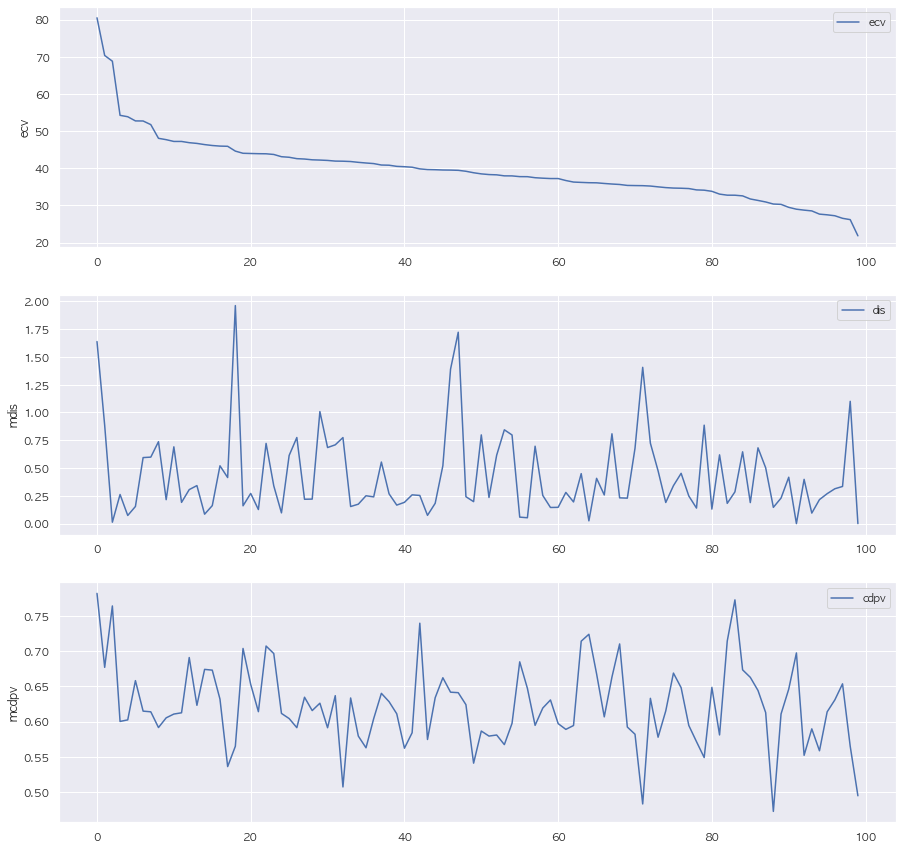

In [118]:
fig, axes = plt.subplots(3,1, figsize=(15,15))

sns.lineplot(data=copy_data_2['ecv'], label='ecv', ax=axes[0])
sns.lineplot(data=copy_data_2['mdis'], label='dis', ax=axes[1])
sns.lineplot(data=copy_data_2['mcdpv'], label='cdpv', ax=axes[2])

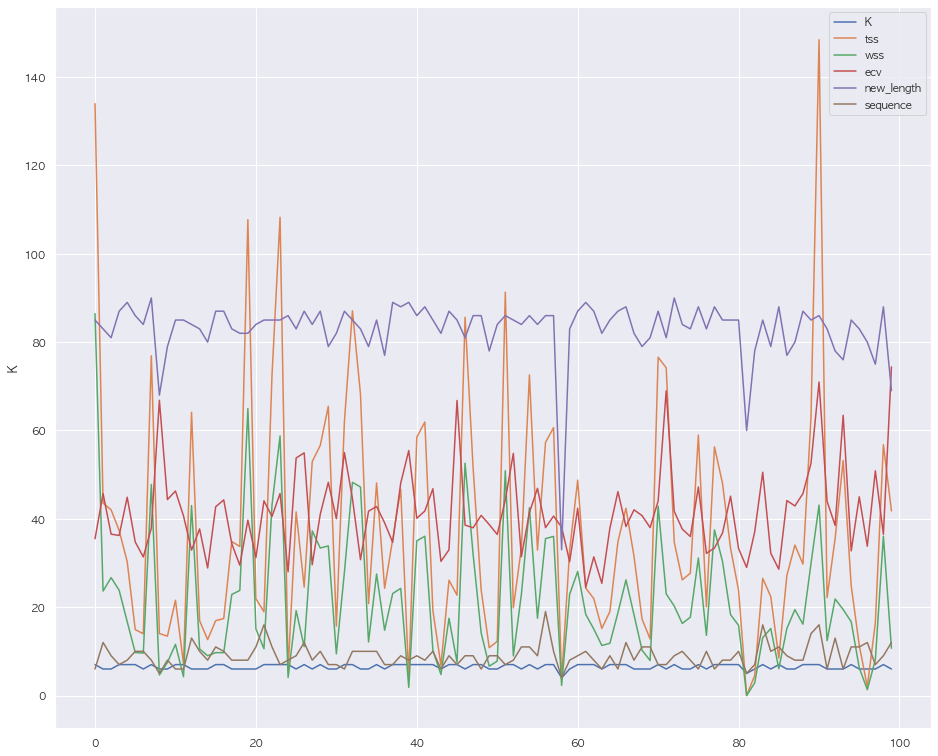

In [50]:
for col in tss_transition:
    if col == "uid":
        continue
    if col == "index":
        continue
    if col == "og_length":
        continue
    if col == "cdpv":
        continue
    if col == "mdis":
        continue
    if col == "mcdpv":
        continue
    sns.lineplot(data=tss_transition[col], label=col)


In [21]:
uid_check

['아파트1-104-1006',
 '아파트4-101-1102',
 '아파트3-102-505',
 '아파트1-101-704',
 '아파트1-101-1403',
 '아파트3-102-1205',
 '아파트2-4-1206',
 '아파트2-2-710',
 '아파트2-4-502',
 '아파트1-101-1302',
 '아파트3-102-702',
 '아파트4-103-404',
 '아파트4-103-103',
 '아파트4-103-108',
 '아파트3-101-1001',
 '아파트3-103-1302',
 '아파트2-3-601',
 '아파트1-104-204',
 '아파트2-2-101',
 '아파트1-103-1604',
 '아파트1-103-406',
 '아파트3-103-1426',
 '아파트1-103-903',
 '아파트4-102-803',
 '아파트4-103-1307',
 '아파트1-103-1905',
 '아파트1-103-503',
 '아파트4-103-804',
 '아파트1-103-602',
 '아파트3-101-703',
 '아파트2-4-901',
 '아파트1-103-1504',
 '아파트3-103-827',
 '아파트1-103-1004',
 '아파트1-102-903',
 '아파트1-103-703',
 '아파트4-103-1404',
 '아파트2-5-913',
 '아파트3-101-602',
 '아파트2-2-1508',
 '아파트4-104-1501',
 '아파트2-2-702',
 '아파트3-101-806',
 '아파트3-102-1702',
 '아파트3-103-612',
 '아파트2-2-502',
 '아파트2-2-105',
 '아파트2-2-603',
 '아파트3-103-102',
 '아파트3-102-1305',
 '아파트3-103-1827',
 '아파트4-103-902',
 '아파트1-101-803',
 '아파트4-103-909',
 '아파트2-2-308',
 '아파트3-102-1103',
 '아파트4-103-907',
 '아파트1-102-901',
 '아파트3-101-405',
 '